# Data Science: Module 11
## Module 11 Assignment: Decision Trees & Random Forests 
### Jacob Goodman and Alan Leidner
#### Nov 24, 2021
Assignment: https://yu.instructure.com/courses/50398/assignments/191939

# Introduction 

In this notebook, we will compare the performance of decision trees vs. random forests. The data set we will be working with is the dataset we first engaged within Project 1. The dataset is comprised of more than 73,000 observations, each of which pertains to a particular NY State school district and associated subgroupings/categorizations of high school students who had been enrolled for at least 4 years as of the end of the 2018-2019 school year. 

The response variable we will be modeling will be a categorical indicator variable derived from the dataset’s reg_pct attribute. 

## Attribute Information
0. report_school_year: Indicates school year for which high school graduation info is being reported
1. aggregation_index: Numeric code identifying manner in which high school graduation data has been aggregated
2. aggregation_type: Text description of how high school graduation data has been aggregated
3. aggregation_name: 
4. nrc_code: Numeric code identifying "needs / resource capacity", which is an indicator of the type of school district
5. nrc_desc: Text description of the type of school district
6. county_code: Numeric code for county name
7. county_name: Full name of applicable NY State county
8. nyc_ind: Indicates whether or not the school district resides within the borders of NYC
9. membership_desc: Indicates school year in which students first enrolled in High School 
10. subgroup_code: Numeric code identifying student subgrouping
11. subgroup_name: Text description of student subgrouping. Note that a student may belong to MORE THAN ONE subgrouping (e.g., "Female", "Hispanic", "Not English Language Learner", etc.)
12. enroll_cnt: How many students of the indicated subgrouping were enrolled during the given school year
13. grad_cnt: How many enrolled students of the indicated subgrouping graduated at the end of the given school year
14. grad_pct: What percentage of enrolled students of the indicated subgrouping graduated at the end for the given school year
15. local_cnt: How many enrolled students of the indicated subgrouping were awarded a "Local" diploma
16. local_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Local" diploma
17. reg_cnt: How many enrolled students of the indicated subgrouping were awarded a "Regents" diploma
18. reg_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Regents" diploma
19. reg_adv_cnt: How many enrolled students of the indicated subgrouping were awarded a "Regents Advanced" diploma
20. reg_adv_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Regents Advanced" diploma
21. non_diploma_credential_cnt: How many enrolled students of the indicated subgrouping achieved a non-diploma credential
22. non_diploma_credential_pct: What percentage of enrolled students of the indicated subgrouping achieved a non-diploma credential
23. still_enrolled_cnt: How many enrolled students of the indicated subgrouping did not graduate but were still_enrolled
24. still_enrolled_pct: What percentage of enrolled students of the indicated subgrouping did not graduate but were still_enrolled
25. ged_cnt: How many enrolled students of the indicated subgrouping were awarded a "GED" diploma
26. ged_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "GED" diploma
27. dropout_cnt: How many enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year
28. dropout_pct: What percentage of enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year

In [1]:
#Import packages for data frames 
import numpy as np
import pandas as pd

#Import pyplot and seaborn for graph creating
import matplotlib.pyplot as plt
import seaborn as sns 

#Importing to dummy categorical data
from patsy import dmatrix

#This ingores depreciation warnings, which will make the code more readable
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Exploratory Data Analysis 
The dataset was loaded into the DAV 6150 Github Repository for Project1 here: https://raw.githubusercontent.com/yuleidner/DAV-6150/main/M6/Project1_Data.csv. This notebook will now load the csv into a Pandas dataframe for analysis.

In [2]:
# read a set of sample data from github. It contains information related to cars and insurance
filename = "https://raw.githubusercontent.com/yuleidner/DAV-6150/main/M6/Project1_Data.csv"
df = pd.read_csv(filename)
pd.set_option('display.max_columns', None) #expands df to display all columns
df.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658,464,71%,63,10%,310,47%,91,14%,16,2%,30,5%,0,0%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324,246,76%,30,9%,169,52%,47,15%,2,1%,11,3%,0,0%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334,218,65%,33,10%,141,42%,44,13%,14,4%,19,6%,0,0%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,4,American Indian/Alaska Native,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367,248,68%,42,11%,183,50%,23,6%,10,3%,18,5%,0,0%,91,25%


### Data Validation

In [3]:
## a few methods will now be called to view summaries of this dataframe
df.shape

(73152, 29)

Nothing surprising here, but it did help us catch aggregation_name, which we missed in our first review of Attribute Information.
#### Character Cleanup

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   report_school_year          73152 non-null  object
 1   aggregation_index           73152 non-null  int64 
 2   aggregation_type            73152 non-null  object
 3   aggregation_name            73152 non-null  object
 4   nrc_code                    73152 non-null  int64 
 5   nrc_desc                    73152 non-null  object
 6   county_code                 73152 non-null  int64 
 7   county_name                 73152 non-null  object
 8   nyc_ind                     73152 non-null  int64 
 9   membership_desc             73152 non-null  object
 10  subgroup_code               73152 non-null  int64 
 11  subgroup_name               73152 non-null  object
 12  enroll_cnt                  73152 non-null  object
 13  grad_cnt                    73152 non-null  ob

Although the info() function is reporting that there are no "null" responses, we can see in our head() function that at least some values are using  '-' instead. We will replace those strings using np.nan values now.

In [5]:
df = df.replace('-', np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   report_school_year          73152 non-null  object
 1   aggregation_index           73152 non-null  int64 
 2   aggregation_type            73152 non-null  object
 3   aggregation_name            73152 non-null  object
 4   nrc_code                    73152 non-null  int64 
 5   nrc_desc                    73152 non-null  object
 6   county_code                 73152 non-null  int64 
 7   county_name                 73152 non-null  object
 8   nyc_ind                     73152 non-null  int64 
 9   membership_desc             73152 non-null  object
 10  subgroup_code               73152 non-null  int64 
 11  subgroup_name               73152 non-null  object
 12  enroll_cnt                  39674 non-null  object
 13  grad_cnt                    39674 non-null  ob

#### Datatype Cleanup
We also notice that the dtype assigned from the pandas import does not meet our expectations, likely due to the '-' character in the columns used instead of Nan. We will now convert the columns to the appropriate dtypes. First, we must remove all of the '%' characters.

In [6]:
pct_columns = ['grad_pct','local_pct','reg_pct','reg_adv_pct','non_diploma_credential_pct','still_enr_pct','ged_pct','dropout_pct']

for p  in pct_columns:
  df[p] = df[p].str.replace('%', '')
  
df.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658,464,71,63,10,310,47,91,14,16,2,30,5,0,0,148,22
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324,246,76,30,9,169,52,47,15,2,1,11,3,0,0,65,20
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334,218,65,33,10,141,42,44,13,14,4,19,6,0,0,83,25
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,4,American Indian/Alaska Native,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367,248,68,42,11,183,50,23,6,10,3,18,5,0,0,91,25


In [7]:
cnt_columns = ['enroll_cnt','grad_cnt','local_cnt','reg_cnt','reg_adv_cnt','non_diploma_credential_cnt','still_enr_cnt','ged_cnt','dropout_cnt']
num_categorical = ['aggregation_index','nrc_code','county_code','nyc_ind','subgroup_code']
for c in cnt_columns+pct_columns+num_categorical:
  df[c] = pd.to_numeric(df[c])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   report_school_year          73152 non-null  object 
 1   aggregation_index           73152 non-null  int64  
 2   aggregation_type            73152 non-null  object 
 3   aggregation_name            73152 non-null  object 
 4   nrc_code                    73152 non-null  int64  
 5   nrc_desc                    73152 non-null  object 
 6   county_code                 73152 non-null  int64  
 7   county_name                 73152 non-null  object 
 8   nyc_ind                     73152 non-null  int64  
 9   membership_desc             73152 non-null  object 
 10  subgroup_code               73152 non-null  int64  
 11  subgroup_name               73152 non-null  object 
 12  enroll_cnt                  39674 non-null  float64
 13  grad_cnt                    396

In [8]:
#We are going to look at the statistical analysis of our data
df.describe()

,aggregation_index,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
count,73152.0,73152.000000,73152.000000,73152.000000,73152.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000
mean,3.0,4.588583,36.251859,0.055255,12.000930,192.120079,161.178354,84.406614,12.340903,8.479936,86.804708,43.371125,62.032742,32.577204,1.924485,1.742627,11.299516,5.190704,1.377577,0.612693,16.239225,7.963049
std,0.0,1.203507,20.588044,0.228479,7.213138,439.972474,361.294773,15.679500,32.046302,10.398486,225.795826,17.124891,132.777866,23.001197,6.498913,4.063987,40.766672,8.832710,4.949389,1.985445,50.129834,9.658698
min,3.0,1.000000,1.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.0,4.000000,17.000000,0.000000,6.000000,25.000000,20.000000,79.000000,1.000000,2.000000,10.000000,33.000000,4.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,3.0,5.000000,40.000000,0.000000,11.000000,66.000000,57.000000,89.000000,4.000000,6.000000,27.000000,43.000000,18.000000,31.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,3.000000,5.000000
75%,3.0,5.000000,57.000000,0.000000,18.000000,179.000000,156.000000,95.000000,10.000000,11.000000,69.000000,53.000000,62.000000,49.000000,2.000000,2.000000,5.000000,6.000000,1.000000,0.000000,9.000000,11.000000
max,3.0,6.000000,68.000000,1.000000,25.000000,9176.000000,7540.000000,100.000000,557.000000,100.000000,4752.000000,100.000000,2231.000000,100.000000,279.000000,67.000000,1381.000000,100.000000,97.000000,67.000000,1091.000000,100.000000


#### Null Visualization

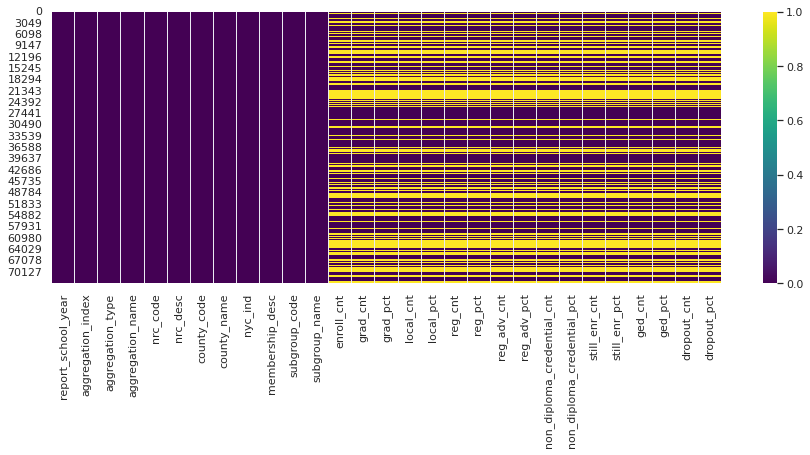

In [9]:
#null visualization
sns.set(rc={'figure.figsize':(15,5)})
sns.heatmap(df.isnull(), cmap='viridis');

50% of our target variable is missing, which is troubling. The missing data in the cnt/pct features line up with our missing target perfectly. We will have to perform some analyses to see if these missing values are correlated with categorical values. There doesn't seem to be a unique key in the dataset for us to check to see if there are duplicates. We may need to drop all rows with the missing target variable: it is too large of a group to impute.

### Custom function
We find ourselves turning to the same methods and visualizations for univariate analysis. The following function will be utilized to standardize our EDA and simplify code.

In [10]:
def distbox (i,df , type = 'numeric',normalize=True):
  """ 
  This function is designed to provide distribution statics and visualizations of dataframe columns
  it takes in a column number and dataframe and can return:
   numerical output -
            1. the skewness of the column
            2. the kurtosis or spread
            3. the descriptive statistics from .describe()
            4. a histogram and boxplot
            
  OR categorical -        
            1. countplot
            2. values counts (either count or as percentages)
  """
  #best practice import dependencies in functions
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  import warnings 
  warnings.filterwarnings("ignore", category=FutureWarning)
  c = df.iloc[:,i]
  plt.figure(figsize=(8,4))
  if type =='numeric':
    plt.subplot(1,2,1);#Histogram location
    sns.distplot(c);#calls a histogram
    plt.title(df.columns[i]);#adds title
    plt.subplot(1,2,2);#Boxplot location
    sns.boxplot(c);#calls a box and whisket plot
    plt.title(df.columns[i]);#adds title
    print("Skewness: %f" %c.skew()) #Adds Skew value
    # If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
    # If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
    # If the skewness is less than -1 or greater than 1, the data are highly skewed
    print("Kurtosis: %f" %c.kurt(skipna = True)) #Adds Kurtosis value (tail-ness)
    # While kurtosis determines the heaviness of the distribution tails.
    # Kurtosis > 3 thin and not spread
    # Kurtosis <3 moderate spread
    print(c.describe()) #Adds summary statistics of the variable


  elif type == 'categorical':
    sns.countplot(c)
    plt.title(df.columns[i]);#adds title
    print(c.value_counts(normalize=normalize))

  print("Nullcount: %f" %c.isnull().sum().sum())
  plt.show() # this will load image to console before executing next line of code

### reg_pct (Target)

What percentage of enrolled students of the indicated subgrouping was awarded a "Regents" diploma

Skewness: 0.326277
Kurtosis: 0.869141
count    39674.000000
mean        43.371125
std         17.124891
min          0.000000
25%         33.000000
50%         43.000000
75%         53.000000
max        100.000000
Name: reg_pct, dtype: float64
Nullcount: 33478.000000


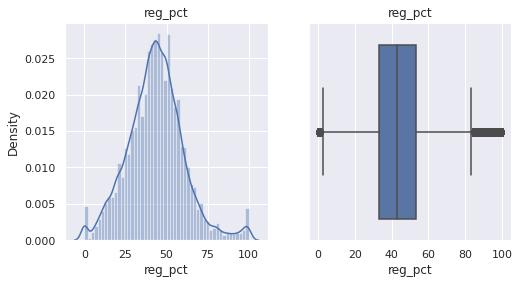

In [11]:
distbox(18,df)

analysis:
This is a Gaussian distribution. It has a few outliers which we may want to pay attention to.

### reg_cnt

How many enrolled students of the indicated subgrouping were awarded a "Regents" diploma

Skewness: 8.059655
Kurtosis: 102.728247
count    39674.000000
mean        86.804708
std        225.795826
min          0.000000
25%         10.000000
50%         27.000000
75%         69.000000
max       4752.000000
Name: reg_cnt, dtype: float64
Nullcount: 33478.000000


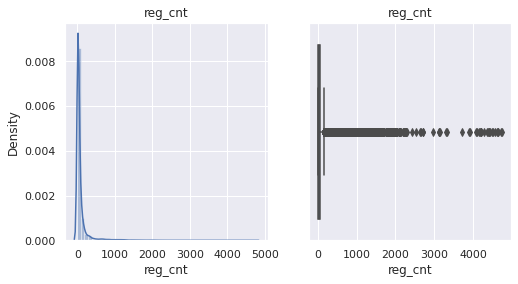

In [12]:
distbox(17,df)

Analysis: 
It will be interesting to compare to other cnt features. It is also interesting how the percentage target feature is normal, but the count is heavily skewed. We expect the size of the school has a large effect on the outliers. We will be dropping this feature in our data preparation to prevent leaked information in the modeling.

### report_school_year

All rows are entries for the same year. This may be useful when performing 

analyses across years, but is not relevant in our context. We will drop this column.

### aggregation_index

50.0    0.038514
44.0    0.030499
40.0    0.029994
43.0    0.029969
38.0    0.028734
          ...   
84.0    0.000630
87.0    0.000630
2.0     0.000378
3.0     0.000328
1.0     0.000101
Name: reg_pct, Length: 101, dtype: float64
Nullcount: 33478.000000


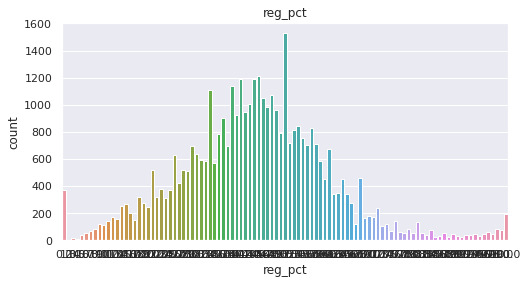

In [13]:
df.aggregation_index.value_counts()
distbox(18,df,type='categorical')

All rows are entries for the same aggregation type. This may be useful when performing analyses across datasets, but is not relevant in our context. We will drop this column.
### aggregation_type

In [14]:
df.aggregation_type.value_counts()

All entries have been aggregated by District. This may be useful when performing analyses across datasets, but is not relevant in our context. We will drop this column.

### aggregation_name

In [15]:
df.aggregation_name.value_counts()

In [16]:
len(pd.unique(df['aggregation_name']))

680

This may be a useful categorical feature that identifies the district of each student. The large number of values means that we will have to employ some grouping techniques such as hashing.

### nrc_code/nrc_desc

This is a code and description of the type of school district.

In [17]:
df.nrc_code.value_counts()

We can see there is quite a difference between these types of school districts. We will now match the numeric value to the description of these 'nrc' categories.

In [18]:
#group all nrc_code values by group, and then assign the appropriate desc for unique values
nrc_group = df.groupby('nrc_code')
nrc = nrc_group.apply(lambda x: x['nrc_desc'].unique())

nrc

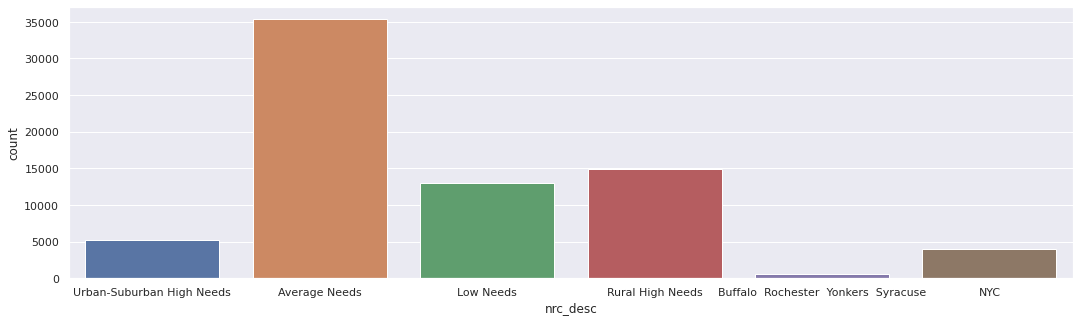

In [19]:
#visualize groups
sns.set(rc={'figure.figsize':(18,5)})
sns.countplot(df.nrc_desc);

The nrc attribute identifies "needs / resource capacity", or the type of school district. The distribution may be something to watch out for in terms of representation in the training/validation split for data models. This feature seems to be partially rank ordered, but not completely. 

conclusions: 
drop nrc_code and handle nrc_desc carefully 
### county_code/county_name

In [20]:
#group all county_code values by group, and then assign the appropriate desc for unique values
county_group = df.groupby('county_code')
county = county_group.apply(lambda x: x['county_name'].unique())

county

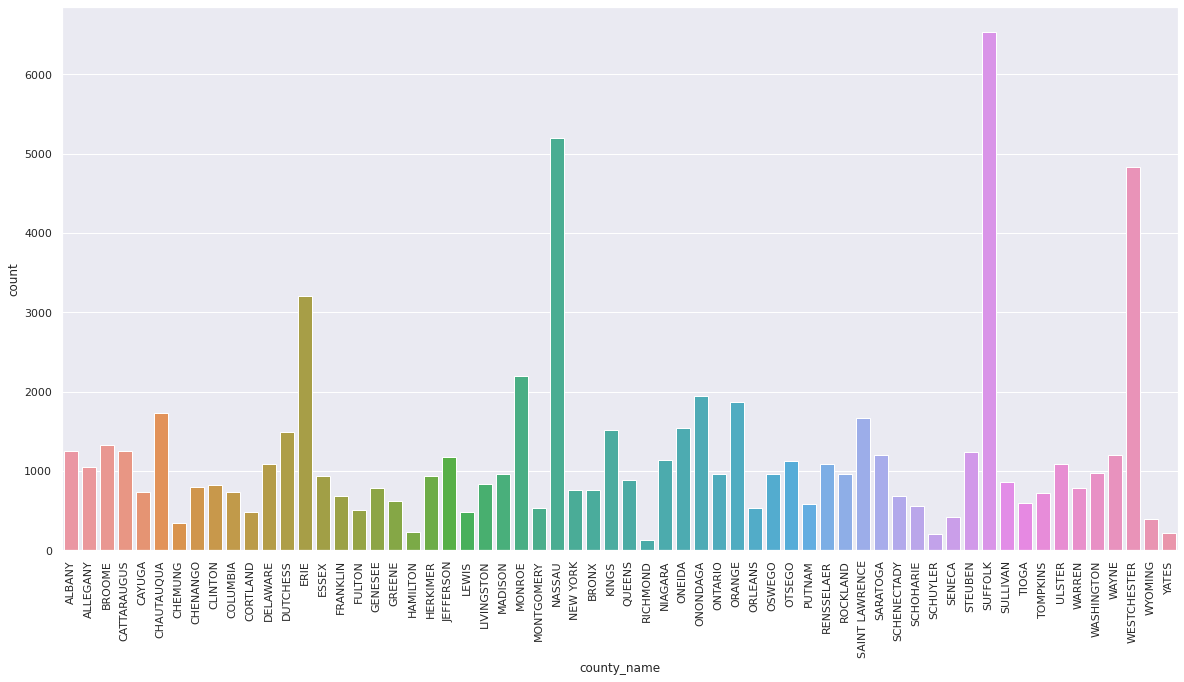

In [21]:
#visualize groups
sns.set(rc={'figure.figsize':(20,10)})
plt.xticks(rotation=90)
sns.countplot(df.county_name);

We see a wide gap between the number of entries per county

Conclusion: 

Drop county_code, treat county_name with care
### nyc_ind

0    0.944745
1    0.055255
Name: nyc_ind, dtype: float64
Nullcount: 0.000000


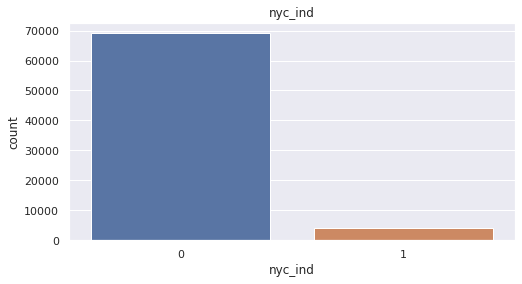

In [22]:
distbox(8,df, 'categorical')

We expect this feature to be correlated with county_code and nrc_code, but will leave feature selection for a later section. It is unbalanced, but that is ok.

### membership_desc
Indicates school year in which students first enrolled in High School

2015 Total Cohort - 4 Year Outcome                  0.168129
2015 Total Cohort - 4 Year Outcome - August 2019    0.168129
2014 Total Cohort - 5 Year Outcome                  0.167555
2014 Total Cohort - 5 Year Outcome - August 2019    0.167555
2013 Total Cohort - 6 Year Outcome                  0.164315
2013 Total Cohort - 6 Year Outcome - August 2019    0.164315
Name: membership_desc, dtype: float64
Nullcount: 0.000000


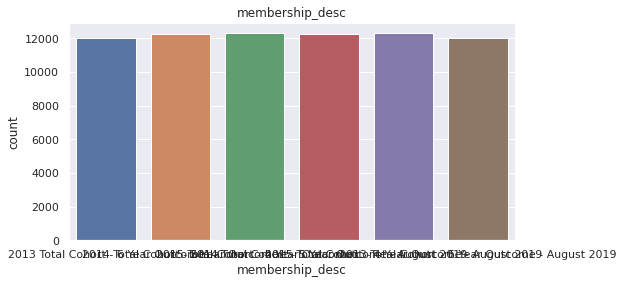

In [23]:
distbox(9,df, 'categorical')

This has a relatively even grouping. We will dummy the feature.

### subgroup_code/subgroup_name/enroll_cnt

subgroup: Note that a student may belong to MORE THAN ONE subgrouping (e.g., "Female", "Hispanic", "Not English Language Learner", etc.)

enroll_cnt: How many students of the indicated subgrouping were enrolled during the given school year

In [24]:
#group all subgroup_code values by group, and then assign the appropriate name for unique values
subgroup_group = df.groupby('subgroup_code')
subgroup = subgroup_group.apply(lambda x: x['subgroup_name'].unique())

subgroup

In [25]:
sg_val = df.subgroup_code.value_counts(sort=False) 
sg_val

Conclusion: 

We have several sparse classes which we may combine. We will drop subgroup_code, a categorical column which is represented by ordinal data at the moment, which we can gather from subgroup_name

### grad_cnt

How many enrolled students of the indicated subgroup graduated at the end of the given school year

Skewness: 7.768134
Kurtosis: 97.521516
count    39674.000000
mean       161.178354
std        361.294773
min          0.000000
25%         20.000000
50%         57.000000
75%        156.000000
max       7540.000000
Name: grad_cnt, dtype: float64
Nullcount: 33478.000000


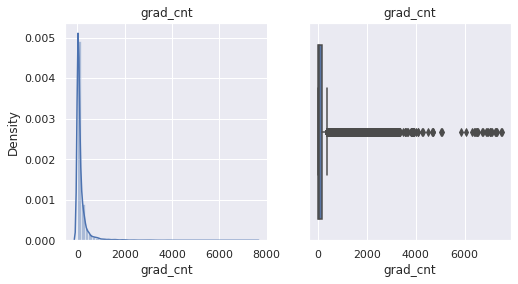

In [26]:
distbox(13,df)

This feature is heavily skewed.

conclusions:

We will normalize and standardize
### grad_pct
What percentage of enrolled students of the indicated subgrouping graduated at the end for the given school year

Skewness: -1.968723
Kurtosis: 4.956242
count    39674.000000
mean        84.406614
std         15.679500
min          0.000000
25%         79.000000
50%         89.000000
75%         95.000000
max        100.000000
Name: grad_pct, dtype: float64
Nullcount: 33478.000000


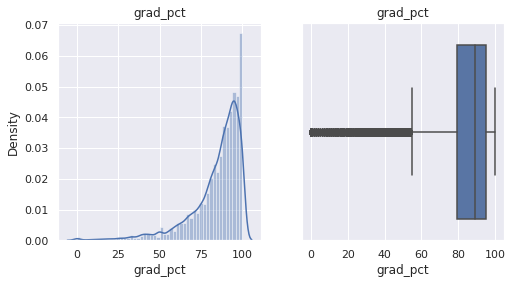

In [27]:
distbox(14,df)

It is off that grad_pct is left skewed when grad_cnt is right skewed.

conclusions:

We will normalize and standardize

### local_cnt

Skewness: 6.621719
Kurtosis: 60.720475
count    39674.000000
mean        12.340903
std         32.046302
min          0.000000
25%          1.000000
50%          4.000000
75%         10.000000
max        557.000000
Name: local_cnt, dtype: float64
Nullcount: 33478.000000


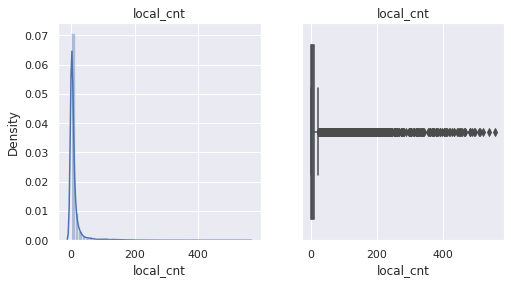

In [28]:
distbox(15,df)

This is skewed heavily to the right with many outliers.

conclusions:

We will normalize and standardize

### local_pct

Skewness: 2.739318
Kurtosis: 10.641760
count    39674.000000
mean         8.479936
std         10.398486
min          0.000000
25%          2.000000
50%          6.000000
75%         11.000000
max        100.000000
Name: local_pct, dtype: float64
Nullcount: 33478.000000


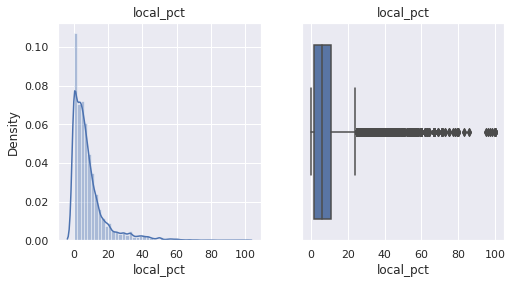

In [29]:
distbox(16,df)

This is skewed heavily to the right with many outliers.

conclusions:

We will normalize and standardize

### reg_adv_cnt

Skewness: 6.255797
Kurtosis: 60.643494
count    39674.000000
mean        62.032742
std        132.777866
min          0.000000
25%          4.000000
50%         18.000000
75%         62.000000
max       2231.000000
Name: reg_adv_cnt, dtype: float64
Nullcount: 33478.000000


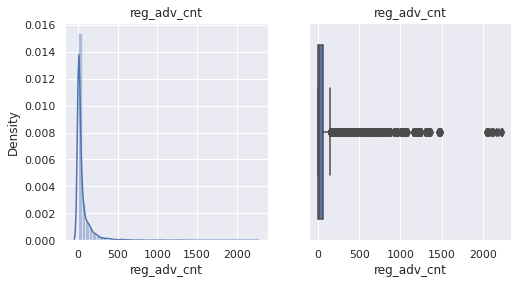

In [30]:
distbox(19,df)

This is skewed heavily to the right with many outliers.

conclusions:

We will normalize and standardize

### reg_adv_pct

Skewness: 0.333009
Kurtosis: -0.682708
count    39674.000000
mean        32.577204
std         23.001197
min          0.000000
25%         14.000000
50%         31.000000
75%         49.000000
max        100.000000
Name: reg_adv_pct, dtype: float64
Nullcount: 33478.000000


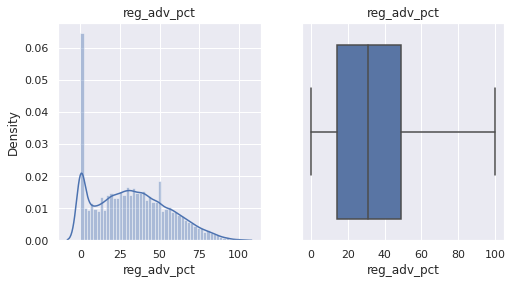

In [31]:
distbox(20,df)

This is a relatively Gaussian distribution, much like our target variable. We would expect it to be strongly predictive.

### reg_adv_pct

Skewness: 0.333009
Kurtosis: -0.682708
count    39674.000000
mean        32.577204
std         23.001197
min          0.000000
25%         14.000000
50%         31.000000
75%         49.000000
max        100.000000
Name: reg_adv_pct, dtype: float64
Nullcount: 33478.000000


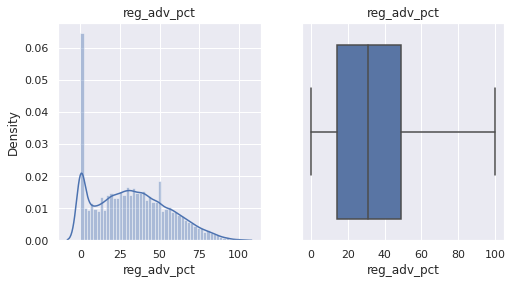

In [32]:
distbox(20,df)

This is skewed heavily to the right with many outliers.

conclusions:

We will normalize and standardize

### non_diploma_credential_cnt

Skewness: 17.986157
Kurtosis: 582.359345
count    39674.000000
mean         1.924485
std          6.498913
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        279.000000
Name: non_diploma_credential_cnt, dtype: float64
Nullcount: 33478.000000


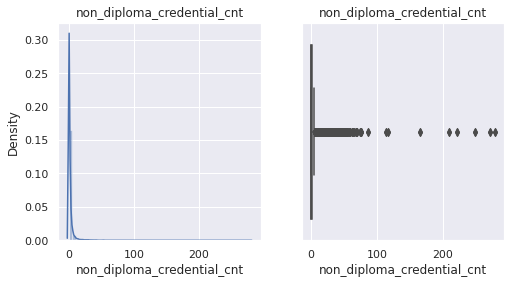

In [33]:
distbox(21,df)

This is skewed heavily to the right with many outliers.

conclusions:

We will normalize and standardize

### non_diploma_credential_pct

Skewness: 4.939532
Kurtosis: 35.948066
count    39674.000000
mean         1.742627
std          4.063987
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         67.000000
Name: non_diploma_credential_pct, dtype: float64
Nullcount: 33478.000000


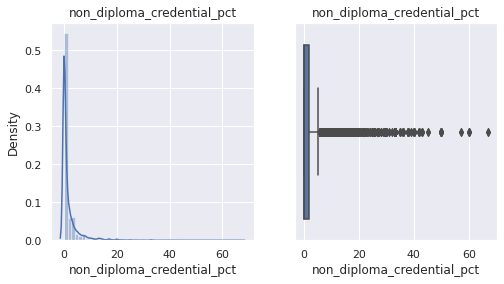

In [34]:
distbox(22,df)

This is skewed heavily to the right with many outliers.

conclusions:

We will normalize and standardize

### still_enr_cnt

Skewness: 10.042656
Kurtosis: 169.593577
count    39674.000000
mean        11.299516
std         40.766672
min          0.000000
25%          0.000000
50%          2.000000
75%          5.000000
max       1381.000000
Name: still_enr_cnt, dtype: float64
Nullcount: 33478.000000


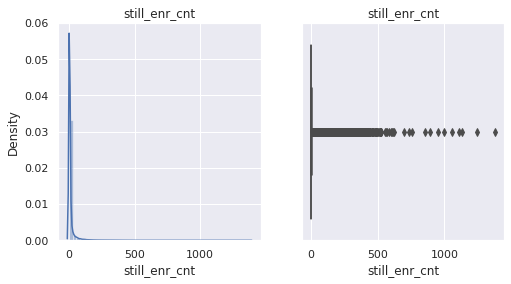

In [35]:
distbox(23,df)

This is skewed heavily to the right with many outliers.

conclusions:

We will normalize and standardize

### still_enr_pct

Skewness: 4.453085
Kurtosis: 31.428664
count    39674.000000
mean         5.190704
std          8.832710
min          0.000000
25%          0.000000
50%          2.000000
75%          6.000000
max        100.000000
Name: still_enr_pct, dtype: float64
Nullcount: 33478.000000


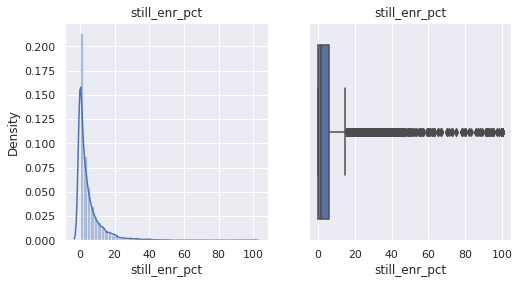

In [36]:
distbox(24,df)

This is skewed heavily to the right with many outliers.

conclusions:

We will normalize and standardize

### ged_cnt

Skewness: 7.733184
Kurtosis: 83.963713
count    39674.000000
mean         1.377577
std          4.949389
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         97.000000
Name: ged_cnt, dtype: float64
Nullcount: 33478.000000


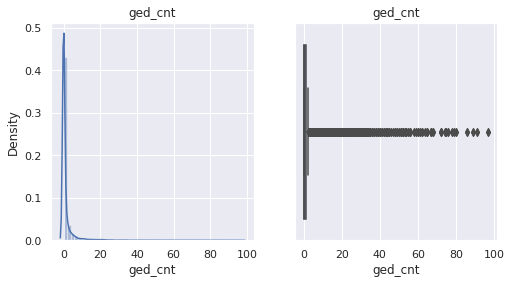

In [37]:
distbox(25,df)

This is skewed heavily to the right with many outliers.

conclusions:

We will normalize and standardize

### ged_pct

Skewness: 9.425612
Kurtosis: 171.746167
count    39674.000000
mean         0.612693
std          1.985445
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         67.000000
Name: ged_pct, dtype: float64
Nullcount: 33478.000000


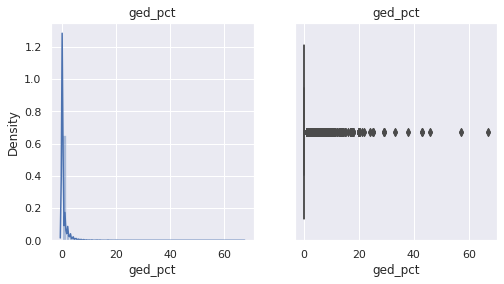

In [38]:
distbox(26,df)

This is skewed heavily to the right with many outliers.

conclusions:

We will normalize and standardize

### dropout_cnt

Skewness: 7.119012
Kurtosis: 73.834067
count    39674.000000
mean        16.239225
std         50.129834
min          0.000000
25%          1.000000
50%          3.000000
75%          9.000000
max       1091.000000
Name: dropout_cnt, dtype: float64
Nullcount: 33478.000000


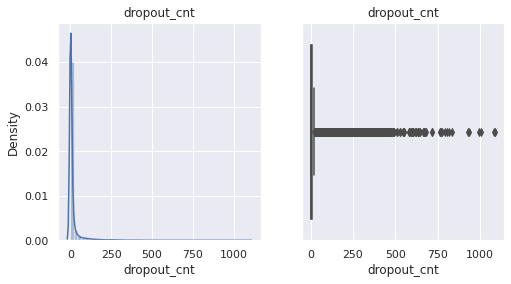

In [39]:
distbox(27,df)

This is skewed heavily to the right with many outliers.

conclusions:

We will normalize and standardize

### dropout_pct 

Skewness: 2.493681
Kurtosis: 9.467020
count    39674.000000
mean         7.963049
std          9.658698
min          0.000000
25%          1.000000
50%          5.000000
75%         11.000000
max        100.000000
Name: dropout_pct, dtype: float64
Nullcount: 33478.000000


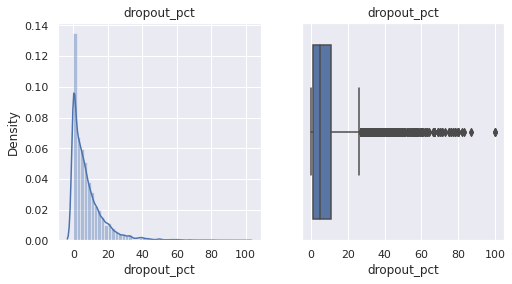

In [40]:
distbox(28,df)

## Multivariate Analysis

### Groups represented data

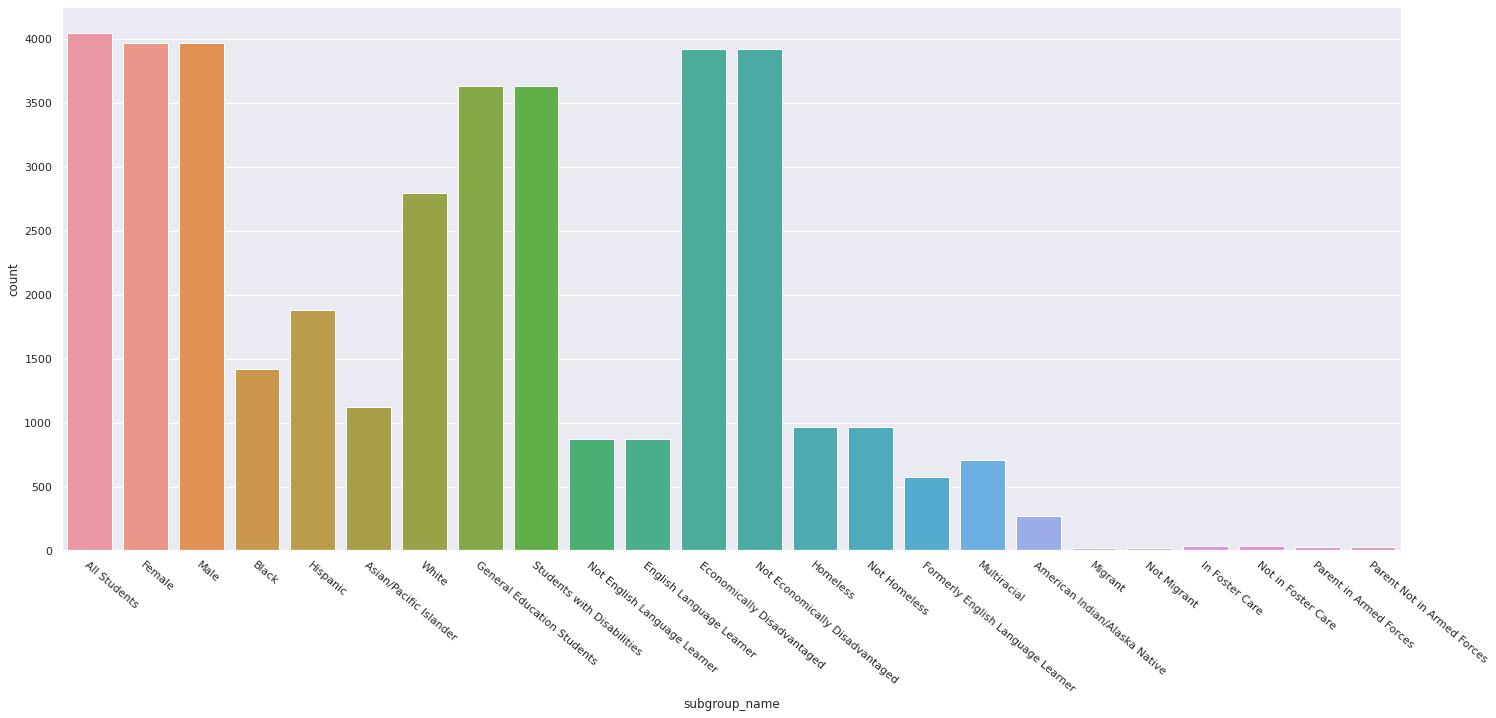

In [41]:
#how many times does the subgroup show up in the datset. lower values = places without students in the category
subgroup_names = df.dropna().subgroup_name
#subgroup_names_counts.index

sns.set(rc={'figure.figsize':(24,10)})
sns.countplot(subgroup_names)
plt.xticks(rotation=-40 , rotation_mode='anchor',ha="left");

conclusions: 

When we drop out null columns, we have several classes that are significantly sparser than others we will combine:   
[Migrant, Not migrant, Foster Care, not in foster care, parent in armed forces, parent not in armed forces]

### Regent Percent by Subgroup

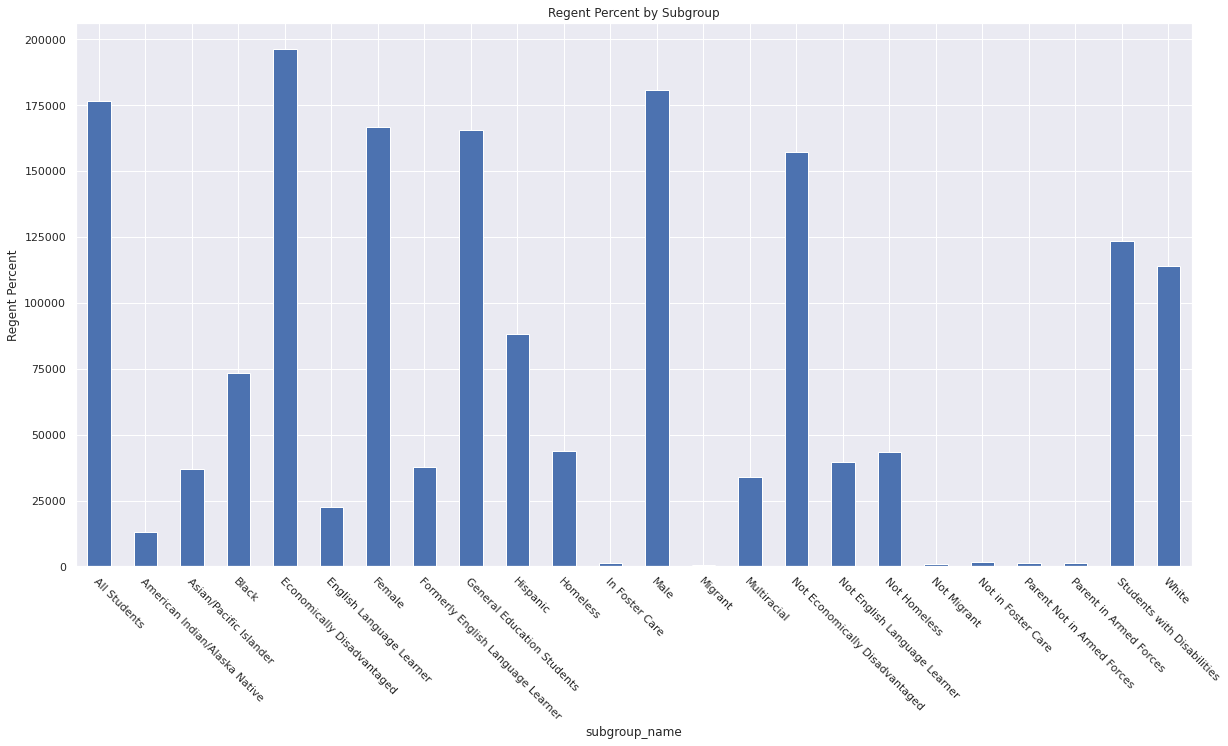

In [42]:
sds = df.groupby(['subgroup_name'])['reg_pct'].agg('sum')
sds.plot(kind='bar', title='Regent Percent by Subgroup', ylabel= 'Regent Percent', figsize=(20,10),);
plt.xticks(rotation=315 , rotation_mode='anchor',ha="left");

It looks like subgroups will be able to split regent percentages into high/low splits very well. We expect this to be prominent in the decision tree's factors.

### Regent Percent by County

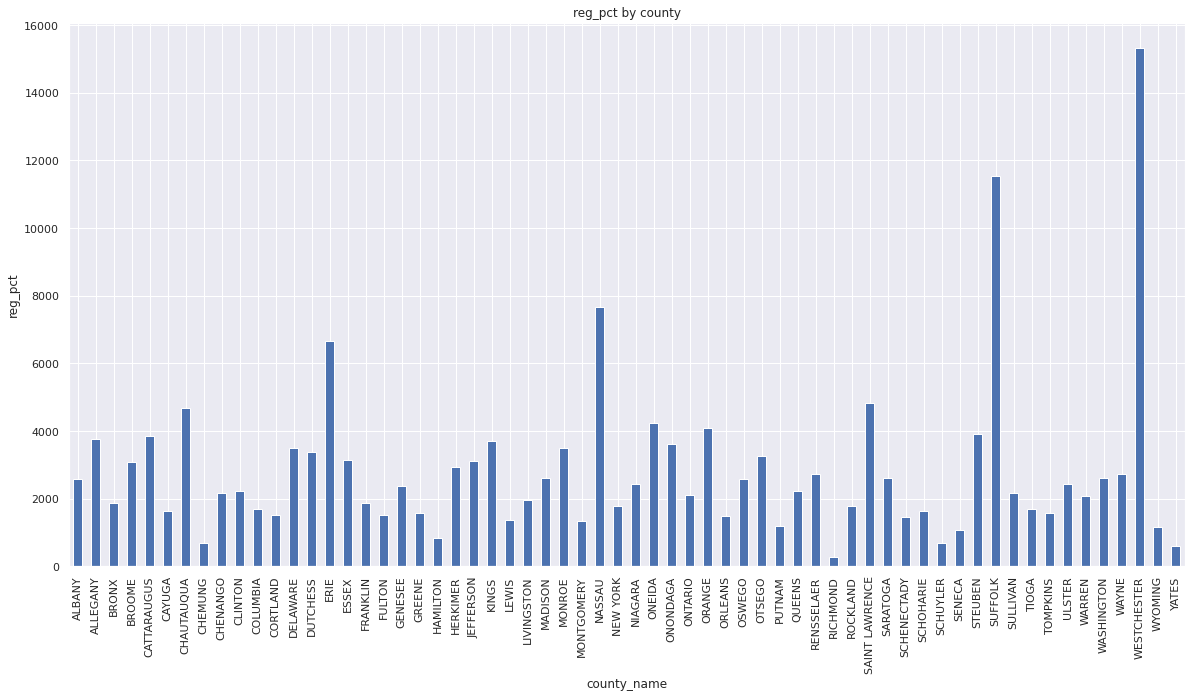

In [43]:
cds = df[df.subgroup_code <= 1].groupby(df['county_name'])['reg_pct'].agg('sum')
cds.plot(kind='bar', title='reg_pct by county', ylabel='reg_pct', figsize=(20,10));

There is a nontrivial range in these values. We expect it to be relatively highly “predictive” of the response variable.

### Correlation Analysis

Analyses of non-categorical co-linearity

#### cnt data

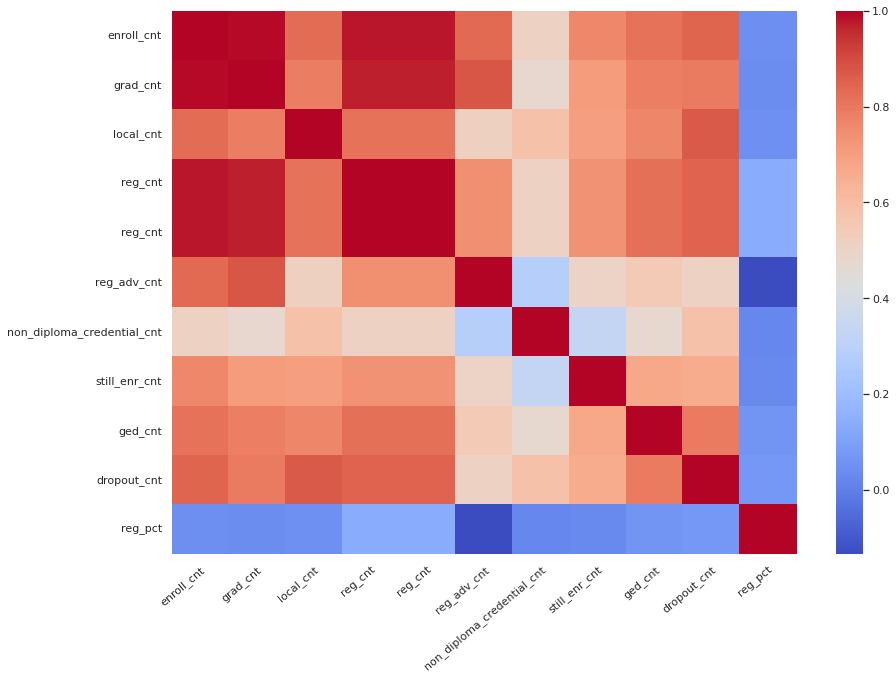

In [44]:
dfn = df[['enroll_cnt','grad_cnt','local_cnt','reg_cnt','reg_cnt','reg_adv_cnt','non_diploma_credential_cnt','still_enr_cnt',
          'ged_cnt','dropout_cnt','reg_pct']]

plt.figure(figsize=(14,10))
sns.heatmap(dfn.corr(),cmap='coolwarm',annot=False);
plt.xticks(rotation=40 , rotation_mode='anchor',ha="right");

None of these univariate features seem to be strongly correlated with our target variable.
#### pct data

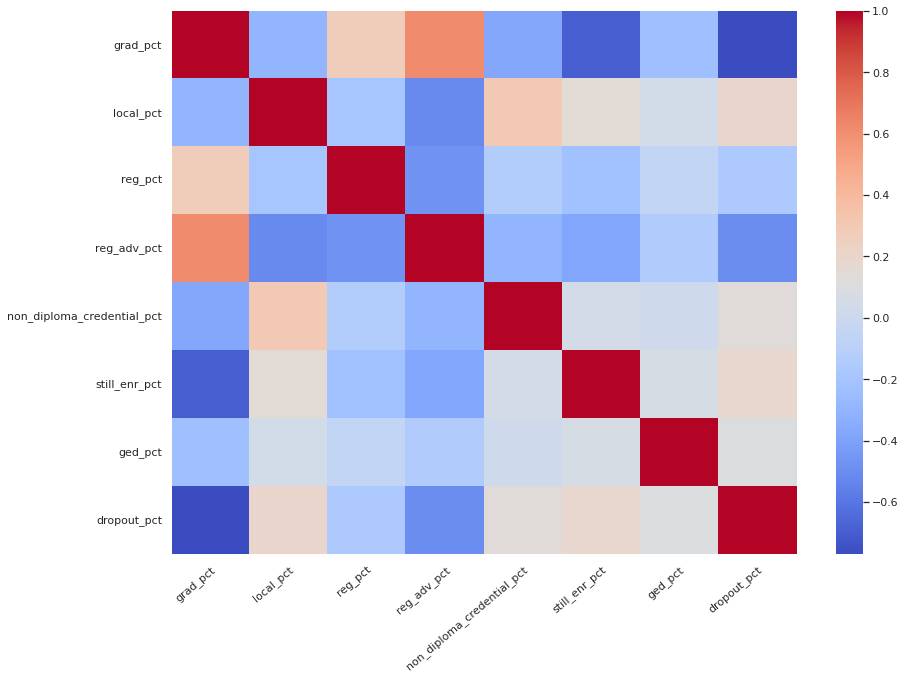

In [45]:
dfn = df[pct_columns]

plt.figure(figsize=(14,10))
sns.heatmap(dfn.corr(),cmap='coolwarm',annot=False);
plt.xticks(rotation=40 , rotation_mode='anchor',ha="right");

The grad-pct feature seems like the strongest correlated feature with reg_pct. We are surprised that reg_adv_pct is not more predictive, but perhaps being in reg_adv is a completely separate category from normal regents. 

# Data Preparation 

We will now prepare the data for modeling, incorporating all of our exploratory findings.

In [46]:
data_prep = df.copy()

## Create TARGET Categorical Indicators 
As the first step of your Data Preparation work, we will create a new categorical indicator variable derived from the content of the reg_pct attribute. Once we have created the reg_pct_level indicator, we will remove the “reg_pct” and “reg_cnt” attributes from our dataframe to eliminate the collinearity that will result from the addition of the “reg_pct_level” indicator.

The `medium` class indicates that the percentage of regents diplomas awarded for a given school district / student subgrouping is between 0.5 * the median percentage of all regent diplomas awarded (i.e., across all school district / student subgroupings) and 1.5 * the median percentage of all regent diplomas awarded (i.e. across all school district / student subgroupings), i.e., (0.5 * median percentage) < percentage of regents diplomas awarded for a given school district <= (1.5 * median percentage)

The `high` class will be all above 1.5 * the median, and the `low` will be all below .5 * the median value.

In [47]:
data_prep['reg_pct'].median()

43.0

In [48]:
data_prep['reg_pct_level'] = 'medium'#create a categorization column, and set all values to medium
data_prep.loc[data_prep['reg_pct'] > (1.5 * data_prep['reg_pct'].median()), 'reg_pct_level'] = 'high'#set all values greater than 1.5 * median to high
data_prep.loc[data_prep['reg_pct'] < (.5 * data_prep['reg_pct'].median()), 'reg_pct_level'] = 'low'#set all values greater than .5 * median to low
data_prep['reg_pct_level'].value_counts()

In [49]:
#sanity checks

scheck = data_prep.loc[data_prep['reg_pct_level'] == 'high', ['reg_pct_level','reg_pct']]
print(scheck.iloc [0:2] )
scheck = data_prep.loc[data_prep['reg_pct_level'] == 'medium', ['reg_pct_level','reg_pct']]
print(scheck.iloc [0:2] )
scheck = data_prep.loc[data_prep['reg_pct_level'] == 'low', ['reg_pct_level','reg_pct']]
print(scheck.iloc [0:2] )
del scheck

   reg_pct_level  reg_pct
35          high     67.0
57          high     79.0
  reg_pct_level  reg_pct
0        medium     47.0
1        medium     52.0
   reg_pct_level  reg_pct
10           low     11.0
32           low     12.0


## Dropping Columns & Rows 

In [50]:
#drop columns identified in EDA and reg_cnt/reg_pct which would leak information to the model
data_prep = data_prep.drop(['report_school_year','aggregation_type','aggregation_index','subgroup_code', 'nrc_code', 'county_code','subgroup_code','reg_pct','reg_cnt'], axis = 1)

# dropping rows
#data_prep.dropna(subset=['dropout_cnt'], inplace=True)

#sanity check
data_prep.shape

(73152, 22)

In [51]:
#sanity check
data_prep.head()

,aggregation_name,nrc_desc,county_name,nyc_ind,membership_desc,subgroup_name,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct,reg_pct_level
0,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,All Students,658.0,464.0,71.0,63.0,10.0,91.0,14.0,16.0,2.0,30.0,5.0,0.0,0.0,148.0,22.0,medium
1,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Female,324.0,246.0,76.0,30.0,9.0,47.0,15.0,2.0,1.0,11.0,3.0,0.0,0.0,65.0,20.0,medium
2,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Male,334.0,218.0,65.0,33.0,10.0,44.0,13.0,14.0,4.0,19.0,6.0,0.0,0.0,83.0,25.0,medium
3,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,American Indian/Alaska Native,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,medium
4,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Black,367.0,248.0,68.0,42.0,11.0,23.0,6.0,10.0,3.0,18.0,5.0,0.0,0.0,91.0,25.0,medium


## Sparse Classes
We will now mutate our categorical variables to handle sparse classes 

### aggregation_name

The first approach we will try will be feature hashing to squash cardinality. We choose 100 columns to reduce the chance of collisions while still reducing cardinality from traditional 1-hot encoding.

In [52]:
from sklearn.feature_extraction import FeatureHasher
num = 100 

aggregation_name = data_prep['aggregation_name']
hasher = FeatureHasher(n_features=num, input_type ='string') 
aggregation_name_hashed = hasher.fit_transform(aggregation_name)
column_names = [f'agg_hash_{x}'for x in range(num)]

aggregation_name_hashed_frame = pd.DataFrame(aggregation_name_hashed.todense(),columns=column_names)

print(aggregation_name_hashed_frame.shape)
aggregation_name_hashed_frame.head()

(73152, 100)


,agg_hash_0,agg_hash_1,agg_hash_2,agg_hash_3,agg_hash_4,agg_hash_5,agg_hash_6,agg_hash_7,agg_hash_8,agg_hash_9,agg_hash_10,agg_hash_11,agg_hash_12,agg_hash_13,agg_hash_14,agg_hash_15,agg_hash_16,agg_hash_17,agg_hash_18,agg_hash_19,agg_hash_20,agg_hash_21,agg_hash_22,agg_hash_23,agg_hash_24,agg_hash_25,agg_hash_26,agg_hash_27,agg_hash_28,agg_hash_29,agg_hash_30,agg_hash_31,agg_hash_32,agg_hash_33,agg_hash_34,agg_hash_35,agg_hash_36,agg_hash_37,agg_hash_38,agg_hash_39,agg_hash_40,agg_hash_41,agg_hash_42,agg_hash_43,agg_hash_44,agg_hash_45,agg_hash_46,agg_hash_47,agg_hash_48,agg_hash_49,agg_hash_50,agg_hash_51,agg_hash_52,agg_hash_53,agg_hash_54,agg_hash_55,agg_hash_56,agg_hash_57,agg_hash_58,agg_hash_59,agg_hash_60,agg_hash_61,agg_hash_62,agg_hash_63,agg_hash_64,agg_hash_65,agg_hash_66,agg_hash_67,agg_hash_68,agg_hash_69,agg_hash_70,agg_hash_71,agg_hash_72,agg_hash_73,agg_hash_74,agg_hash_75,agg_hash_76,agg_hash_77,agg_hash_78,agg_hash_79,agg_hash_80,agg_hash_81,agg_hash_82,agg_hash_83,agg_hash_84,agg_hash_85,agg_hash_86,agg_hash_87,agg_hash_88,agg_hash_89,agg_hash_90,agg_hash_91,agg_hash_92,agg_hash_93,agg_hash_94,agg_hash_95,agg_hash_96,agg_hash_97,agg_hash_98,agg_hash_99
0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We have condensed the aggregation names into a 100 column space, a huge decrease from what we would have by utilizing 1 hot encoding. It is no longer human-readable, but we believe the tradeoff is worthwhile to leverage in feature selection for the model. We will now replace the column in our dataframe with the hashed dataframe.

In [53]:
#replace aggregation name with hashed columns
data_prep.drop(['aggregation_name'], axis=1, inplace=True)
data_prep = pd.concat([data_prep, aggregation_name_hashed_frame], axis=1 )
data_prep.dropna(subset=['dropout_cnt'], inplace=True)#droping target here instead of earlier to prevent problems with concat function
del aggregation_name_hashed_frame
data_prep.head()

,nrc_desc,county_name,nyc_ind,membership_desc,subgroup_name,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct,reg_pct_level,agg_hash_0,agg_hash_1,agg_hash_2,agg_hash_3,agg_hash_4,agg_hash_5,agg_hash_6,agg_hash_7,agg_hash_8,agg_hash_9,agg_hash_10,agg_hash_11,agg_hash_12,agg_hash_13,agg_hash_14,agg_hash_15,agg_hash_16,agg_hash_17,agg_hash_18,agg_hash_19,agg_hash_20,agg_hash_21,agg_hash_22,agg_hash_23,agg_hash_24,agg_hash_25,agg_hash_26,agg_hash_27,agg_hash_28,agg_hash_29,agg_hash_30,agg_hash_31,agg_hash_32,agg_hash_33,agg_hash_34,agg_hash_35,agg_hash_36,agg_hash_37,agg_hash_38,agg_hash_39,agg_hash_40,agg_hash_41,agg_hash_42,agg_hash_43,agg_hash_44,agg_hash_45,agg_hash_46,agg_hash_47,agg_hash_48,agg_hash_49,agg_hash_50,agg_hash_51,agg_hash_52,agg_hash_53,agg_hash_54,agg_hash_55,agg_hash_56,agg_hash_57,agg_hash_58,agg_hash_59,agg_hash_60,agg_hash_61,agg_hash_62,agg_hash_63,agg_hash_64,agg_hash_65,agg_hash_66,agg_hash_67,agg_hash_68,agg_hash_69,agg_hash_70,agg_hash_71,agg_hash_72,agg_hash_73,agg_hash_74,agg_hash_75,agg_hash_76,agg_hash_77,agg_hash_78,agg_hash_79,agg_hash_80,agg_hash_81,agg_hash_82,agg_hash_83,agg_hash_84,agg_hash_85,agg_hash_86,agg_hash_87,agg_hash_88,agg_hash_89,agg_hash_90,agg_hash_91,agg_hash_92,agg_hash_93,agg_hash_94,agg_hash_95,agg_hash_96,agg_hash_97,agg_hash_98,agg_hash_99
0,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,All Students,658.0,464.0,71.0,63.0,10.0,91.0,14.0,16.0,2.0,30.0,5.0,0.0,0.0,148.0,22.0,medium,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Female,324.0,246.0,76.0,30.0,9.0,47.0,15.0,2.0,1.0,11.0,3.0,0.0,0.0,65.0,20.0,medium,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Male,334.0,218.0,65.0,33.0,10.0,44.0,13.0,14.0,4.0,19.0,6.0,0.0,0.0,83.0,25.0,medium,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Black,367.0,248.0,68.0,42.0,11.0,23.0,6.0,10.0,3.0,18.0,5.0,0.0,0.0,91.0,25.0,medium,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Hispanic,98.0,58.0,59.0,13.0,13.0,5.0,5.0,4.0,4.0,8.0,8.0,0.0,0.0,28.0,29.0,medium,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,

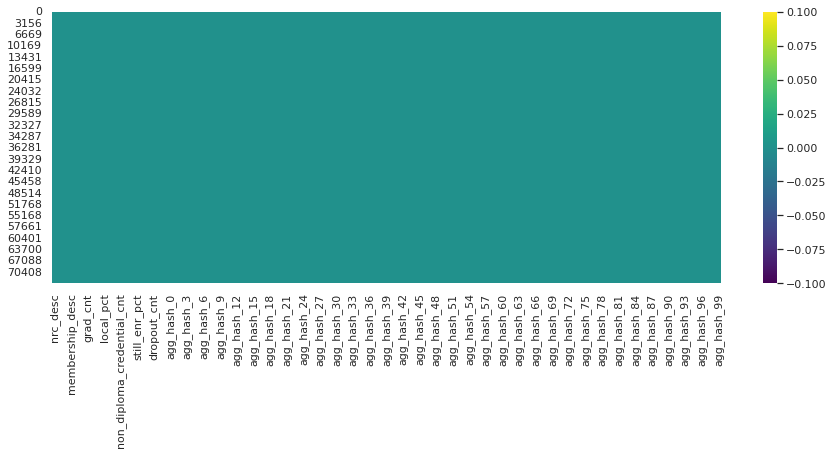

In [54]:
#null visualization
sns.set(rc={'figure.figsize':(15,5)})
sns.heatmap(data_prep.isnull(), cmap='viridis');

### county_name
There are fewer values for county name, so we will explore a simpler sparse class combination
`sum(countyname.value_counts(normalize=True)< .01)` = 19   
there are 19 category names that represent less than 1 percent of our data. We will combine them.

code referenced: https://www.codegrepper.com/code-examples/python/combining+sparse+class

(36,)


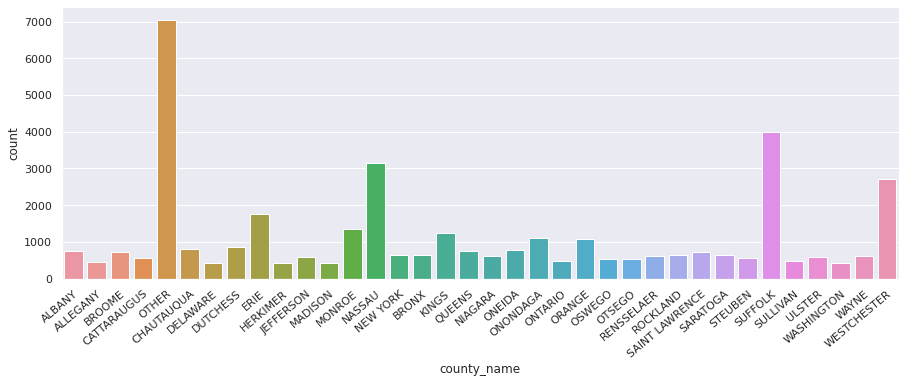

In [55]:
#move data into object for safe mutation
county = data_prep['county_name'].copy()

#create mask to identify subgroups <x percent of data
countylist = county.value_counts(normalize=True) < .01
countylist = countylist[countylist.values].index
mask = county.isin(countylist)

#use mask to update target values
county[mask] = 'OTHER'

#visualize outcome
print(county.value_counts().shape)
sns.countplot(county);
plt.xticks(rotation=40 , rotation_mode='anchor',ha="right");

Conclusion: 

Using our updated county array, we will reduce 58 variables to 36 columns with 1 hot encoding. This is not as good as the 30 we would get with hashing but without the downsides ("collisions" and reduced explain-ability) that we would receive for such a small reduction.

In [56]:
#replace county name with data reduced columns
data_prep['county_name'] = county
del county
data_prep.head()

,nrc_desc,county_name,nyc_ind,membership_desc,subgroup_name,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct,reg_pct_level,agg_hash_0,agg_hash_1,agg_hash_2,agg_hash_3,agg_hash_4,agg_hash_5,agg_hash_6,agg_hash_7,agg_hash_8,agg_hash_9,agg_hash_10,agg_hash_11,agg_hash_12,agg_hash_13,agg_hash_14,agg_hash_15,agg_hash_16,agg_hash_17,agg_hash_18,agg_hash_19,agg_hash_20,agg_hash_21,agg_hash_22,agg_hash_23,agg_hash_24,agg_hash_25,agg_hash_26,agg_hash_27,agg_hash_28,agg_hash_29,agg_hash_30,agg_hash_31,agg_hash_32,agg_hash_33,agg_hash_34,agg_hash_35,agg_hash_36,agg_hash_37,agg_hash_38,agg_hash_39,agg_hash_40,agg_hash_41,agg_hash_42,agg_hash_43,agg_hash_44,agg_hash_45,agg_hash_46,agg_hash_47,agg_hash_48,agg_hash_49,agg_hash_50,agg_hash_51,agg_hash_52,agg_hash_53,agg_hash_54,agg_hash_55,agg_hash_56,agg_hash_57,agg_hash_58,agg_hash_59,agg_hash_60,agg_hash_61,agg_hash_62,agg_hash_63,agg_hash_64,agg_hash_65,agg_hash_66,agg_hash_67,agg_hash_68,agg_hash_69,agg_hash_70,agg_hash_71,agg_hash_72,agg_hash_73,agg_hash_74,agg_hash_75,agg_hash_76,agg_hash_77,agg_hash_78,agg_hash_79,agg_hash_80,agg_hash_81,agg_hash_82,agg_hash_83,agg_hash_84,agg_hash_85,agg_hash_86,agg_hash_87,agg_hash_88,agg_hash_89,agg_hash_90,agg_hash_91,agg_hash_92,agg_hash_93,agg_hash_94,agg_hash_95,agg_hash_96,agg_hash_97,agg_hash_98,agg_hash_99
0,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,All Students,658.0,464.0,71.0,63.0,10.0,91.0,14.0,16.0,2.0,30.0,5.0,0.0,0.0,148.0,22.0,medium,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Female,324.0,246.0,76.0,30.0,9.0,47.0,15.0,2.0,1.0,11.0,3.0,0.0,0.0,65.0,20.0,medium,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Male,334.0,218.0,65.0,33.0,10.0,44.0,13.0,14.0,4.0,19.0,6.0,0.0,0.0,83.0,25.0,medium,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Black,367.0,248.0,68.0,42.0,11.0,23.0,6.0,10.0,3.0,18.0,5.0,0.0,0.0,91.0,25.0,medium,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Hispanic,98.0,58.0,59.0,13.0,13.0,5.0,5.0,4.0,4.0,8.0,8.0,0.0,0.0,28.0,29.0,medium,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,

### subgroup_name 
We will combine any subgroup comprising less than 2 percent of records into a single group

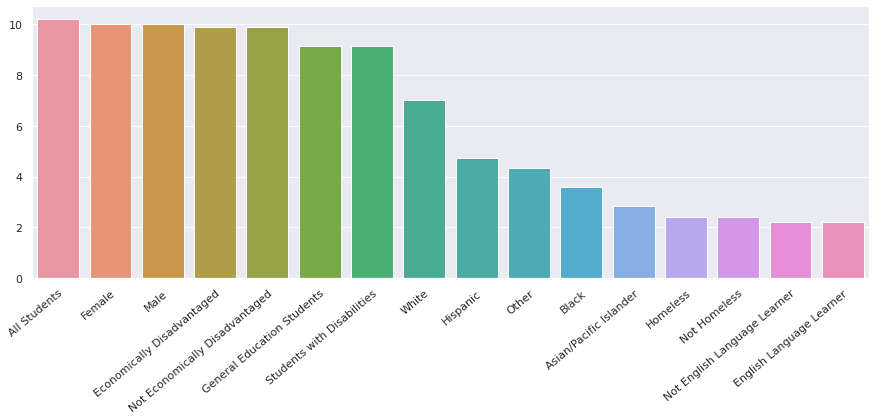

In [57]:
#move data into object for safe mutation
subgroup_name = data_prep['subgroup_name'].copy()

#create mask to identify subgroups <x percent of data
subgroup_drops = subgroup_name.value_counts(normalize=True)<.02
subgroup_drops = subgroup_drops[subgroup_drops.values].index
mask = subgroup_name.isin(subgroup_drops)

#use mask to update target values
subgroup_name[mask]='Other'

#visualize outcome
subgroup_counts = subgroup_name.value_counts(normalize=True)
sns.barplot(subgroup_counts.index,subgroup_counts.values*100);
plt.xticks(rotation=40 , rotation_mode='anchor',ha="right");

In [58]:
#replacing subgroup_name
data_prep['subgroup_name'] = subgroup_name
del subgroup_name
data_prep.subgroup_name.value_counts()#sanity check

### nrc_desc  
To even our classes we will combine the following into an "other" class. ['Buffalo  Rochester  Yonkers  Syracuse ', 'NYC', 'Urban-Suburban High Needs'] 

nyc_id will continue to provide information about NYC membership so we will not lose all distinct data from the NYC area.

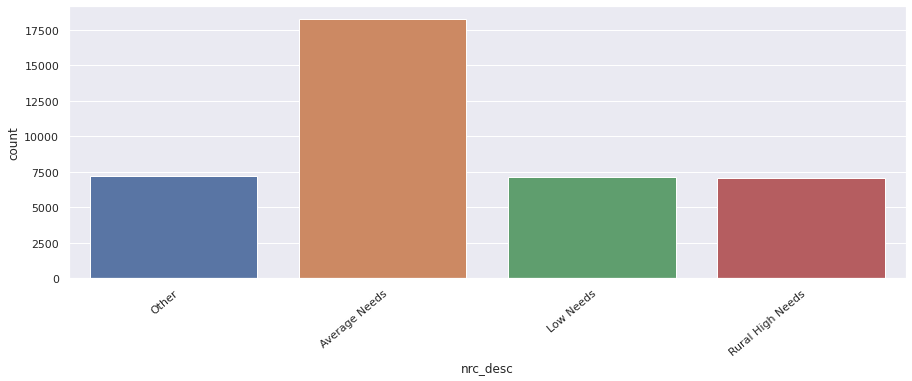

In [59]:
#move data into object for safe mutation
nrc_desc = data_prep['nrc_desc'].copy()

#create mask to identify subgroups
nrc_desc_combine = ['Buffalo  Rochester  Yonkers  Syracuse','NYC','Urban-Suburban High Needs']

mask = nrc_desc.isin(nrc_desc_combine)

#use mask to update target values
nrc_desc[mask]='Other'

#visualize outcome
sns.countplot(nrc_desc);
plt.xticks(rotation=40 , rotation_mode='anchor',ha="right");

In [60]:
#adding transformed nrc_desc back to data_prep
data_prep['nrc_desc'] = nrc_desc
del nrc_desc
data_prep.nrc_desc.value_counts()#sanity check

In [61]:
data_prep.head()

,nrc_desc,county_name,nyc_ind,membership_desc,subgroup_name,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct,reg_pct_level,agg_hash_0,agg_hash_1,agg_hash_2,agg_hash_3,agg_hash_4,agg_hash_5,agg_hash_6,agg_hash_7,agg_hash_8,agg_hash_9,agg_hash_10,agg_hash_11,agg_hash_12,agg_hash_13,agg_hash_14,agg_hash_15,agg_hash_16,agg_hash_17,agg_hash_18,agg_hash_19,agg_hash_20,agg_hash_21,agg_hash_22,agg_hash_23,agg_hash_24,agg_hash_25,agg_hash_26,agg_hash_27,agg_hash_28,agg_hash_29,agg_hash_30,agg_hash_31,agg_hash_32,agg_hash_33,agg_hash_34,agg_hash_35,agg_hash_36,agg_hash_37,agg_hash_38,agg_hash_39,agg_hash_40,agg_hash_41,agg_hash_42,agg_hash_43,agg_hash_44,agg_hash_45,agg_hash_46,agg_hash_47,agg_hash_48,agg_hash_49,agg_hash_50,agg_hash_51,agg_hash_52,agg_hash_53,agg_hash_54,agg_hash_55,agg_hash_56,agg_hash_57,agg_hash_58,agg_hash_59,agg_hash_60,agg_hash_61,agg_hash_62,agg_hash_63,agg_hash_64,agg_hash_65,agg_hash_66,agg_hash_67,agg_hash_68,agg_hash_69,agg_hash_70,agg_hash_71,agg_hash_72,agg_hash_73,agg_hash_74,agg_hash_75,agg_hash_76,agg_hash_77,agg_hash_78,agg_hash_79,agg_hash_80,agg_hash_81,agg_hash_82,agg_hash_83,agg_hash_84,agg_hash_85,agg_hash_86,agg_hash_87,agg_hash_88,agg_hash_89,agg_hash_90,agg_hash_91,agg_hash_92,agg_hash_93,agg_hash_94,agg_hash_95,agg_hash_96,agg_hash_97,agg_hash_98,agg_hash_99
0,Other,ALBANY,0,2013 Total Cohort - 6 Year Outcome,All Students,658.0,464.0,71.0,63.0,10.0,91.0,14.0,16.0,2.0,30.0,5.0,0.0,0.0,148.0,22.0,medium,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Other,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Female,324.0,246.0,76.0,30.0,9.0,47.0,15.0,2.0,1.0,11.0,3.0,0.0,0.0,65.0,20.0,medium,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Other,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Male,334.0,218.0,65.0,33.0,10.0,44.0,13.0,14.0,4.0,19.0,6.0,0.0,0.0,83.0,25.0,medium,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Other,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Black,367.0,248.0,68.0,42.0,11.0,23.0,6.0,10.0,3.0,18.0,5.0,0.0,0.0,91.0,25.0,medium,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Other,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Hispanic,98.0,58.0,59.0,13.0,13.0,5.0,5.0,4.0,4.0,8.0,8.0,0.0,0.0,28.0,29.0,medium,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,

## Standardize and Normalize Quantitative Data

In [62]:
from sklearn.preprocessing import power_transform as pt 

pct_columns = ['grad_pct','local_pct','reg_adv_pct','non_diploma_credential_pct','still_enr_pct','ged_pct','dropout_pct']
cnt_columns = ['enroll_cnt','grad_cnt','local_cnt','reg_adv_cnt','non_diploma_credential_cnt','still_enr_cnt','ged_cnt','dropout_cnt']

columns = cnt_columns + pct_columns
print(columns)

for column in columns:#iterate over identified columns
  a = data_prep[[column]]
  data_prep[column] = pt(a,method='yeo-johnson')#we are performing a yeo-johnson transformation because most of the features have negative or 0 values

data_prep[columns].head()#sanity check

['enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_adv_cnt', 'non_diploma_credential_cnt', 'still_enr_cnt', 'ged_cnt', 'dropout_cnt', 'grad_pct', 'local_pct', 'reg_adv_pct', 'non_diploma_credential_pct', 'still_enr_pct', 'ged_pct', 'dropout_pct']


,enroll_cnt,grad_cnt,local_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt,grad_pct,local_pct,reg_adv_pct,non_diploma_credential_pct,still_enr_pct,ged_pct,dropout_pct
0,1.556674,1.439241,1.795464,0.961980,1.836021,1.554668,-0.588644,1.952577,-1.203165,0.594673,-0.660607,1.105788,0.642314,-0.538319,1.382375
1,1.117188,1.017930,1.405988,0.573121,1.030762,1.139663,-0.588644,1.676750,-0.905171,0.499016,-0.607039,0.653716,0.286694,-0.538319,1.290762
2,1.136630,0.936731,1.459189,0.534733,1.812644,1.383663,-0.588644,1.765441,-1.494472,0.594673,-0.715699,1.446245,0.769219,-0.538319,1.506749
4,1.196556,1.023360,1.589608,0.162589,1.740634,1.361486,-0.588644,1.797294,-1.357296,0.682621,-1.162412,1.321331,0.642314,-0.538319,1.506749
5,0.309499,0.028792,0.899879,-0.646965,1.419519,0.977049,-0.588644,1.322237,-1.722803,0.839897,-1.239624,1.446245,0.966898,-0.538319,1.653244


## Dummying Categorical Data

In [63]:
#dummying county_name, membership_desc, subgroup_name, nrc_desc using the patsy library

formula = """C(subgroup_name)+ C(county_name)+C(membership_desc)+C(nrc_desc)"""
dum = dmatrix(formula, data_prep,return_type='dataframe').astype('int32')
dum.head()

,Intercept,C(subgroup_name)[T.Asian/Pacific Islander],C(subgroup_name)[T.Black],C(subgroup_name)[T.Economically Disadvantaged],C(subgroup_name)[T.English Language Learner],C(subgroup_name)[T.Female],C(subgroup_name)[T.General Education Students],C(subgroup_name)[T.Hispanic],C(subgroup_name)[T.Homeless],C(subgroup_name)[T.Male],C(subgroup_name)[T.Not Economically Disadvantaged],C(subgroup_name)[T.Not English Language Learner],C(subgroup_name)[T.Not Homeless],C(subgroup_name)[T.Other],C(subgroup_name)[T.Students with Disabilities],C(subgroup_name)[T.White],C(county_name)[T.ALLEGANY],C(county_name)[T.BRONX],C(county_name)[T.BROOME],C(county_name)[T.CATTARAUGUS],C(county_name)[T.CHAUTAUQUA],C(county_name)[T.DELAWARE],C(county_name)[T.DUTCHESS],C(county_name)[T.ERIE],C(county_name)[T.HERKIMER],C(county_name)[T.JEFFERSON],C(county_name)[T.KINGS],C(county_name)[T.MADISON],C(county_name)[T.MONROE],C(county_name)[T.NASSAU],C(county_name)[T.NEW YORK],C(county_name)[T.NIAGARA],C(county_name)[T.ONEIDA],C(county_name)[T.ONONDAGA],C(county_name)[T.ONTARIO],C(county_name)[T.ORANGE],C(county_name)[T.OSWEGO],C(county_name)[T.OTHER],C(county_name)[T.OTSEGO],C(county_name)[T.QUEENS],C(county_name)[T.RENSSELAER],C(county_name)[T.ROCKLAND],C(county_name)[T.SAINT LAWRENCE],C(county_name)[T.SARATOGA],C(county_name)[T.STEUBEN],C(county_name)[T.SUFFOLK],C(county_name)[T.SULLIVAN],C(county_name)[T.ULSTER],C(county_name)[T.WASHINGTON],C(county_name)[T.WAYNE],C(county_name)[T.WESTCHESTER],C(membership_desc)[T.2013 Total Cohort - 6 Year Outcome - August 2019],C(membership_desc)[T.2014 Total Cohort - 5 Year Outcome],C(membership_desc)[T.2014 Total Cohort - 5 Year Outcome - August 2019],C(membership_desc)[T.2015 Total Cohort - 4 Year Outcome],C(membership_desc)[T.2015 Total Cohort - 4 Year Outcome - August 2019],C(nrc_desc)[T.Low Needs],C(nrc_desc)[T.Other],C(nrc_desc)[T.Rural High Needs]
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


Now we will replace the categorical values with the dummied data

In [64]:
data_prep.drop(['subgroup_name','county_name','membership_desc','nrc_desc'], axis=1,inplace=True)
data_prep = pd.concat([data_prep, dum], axis=1, )
del dum
data_prep.head()

,nyc_ind,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct,reg_pct_level,agg_hash_0,agg_hash_1,agg_hash_2,agg_hash_3,agg_hash_4,agg_hash_5,agg_hash_6,agg_hash_7,agg_hash_8,agg_hash_9,agg_hash_10,agg_hash_11,agg_hash_12,agg_hash_13,agg_hash_14,agg_hash_15,agg_hash_16,agg_hash_17,agg_hash_18,agg_hash_19,agg_hash_20,agg_hash_21,agg_hash_22,agg_hash_23,agg_hash_24,agg_hash_25,agg_hash_26,agg_hash_27,agg_hash_28,agg_hash_29,agg_hash_30,agg_hash_31,agg_hash_32,agg_hash_33,agg_hash_34,agg_hash_35,agg_hash_36,agg_hash_37,agg_hash_38,agg_hash_39,agg_hash_40,agg_hash_41,agg_hash_42,agg_hash_43,agg_hash_44,agg_hash_45,agg_hash_46,agg_hash_47,agg_hash_48,agg_hash_49,agg_hash_50,agg_hash_51,agg_hash_52,agg_hash_53,agg_hash_54,agg_hash_55,agg_hash_56,agg_hash_57,agg_hash_58,agg_hash_59,agg_hash_60,agg_hash_61,agg_hash_62,agg_hash_63,agg_hash_64,agg_hash_65,agg_hash_66,agg_hash_67,agg_hash_68,agg_hash_69,agg_hash_70,agg_hash_71,agg_hash_72,agg_hash_73,agg_hash_74,agg_hash_75,agg_hash_76,agg_hash_77,agg_hash_78,agg_hash_79,agg_hash_80,agg_hash_81,agg_hash_82,agg_hash_83,agg_hash_84,agg_hash_85,agg_hash_86,agg_hash_87,agg_hash_88,agg_hash_89,agg_hash_90,agg_hash_91,agg_hash_92,agg_hash_93,agg_hash_94,agg_hash_95,agg_hash_96,agg_hash_97,agg_hash_98,agg_hash_99,Intercept,C(subgroup_name)[T.Asian/Pacific Islander],C(subgroup_name)[T.Black],C(subgroup_name)[T.Economically Disadvantaged],C(subgroup_name)[T.English Language Learner],C(subgroup_name)[T.Female],C(subgroup_name)[T.General Education Students],C(subgroup_name)[T.Hispanic],C(subgroup_name)[T.Homeless],C(subgroup_name)[T.Male],C(subgroup_name)[T.Not Economically Disadvantaged],C(subgroup_name)[T.Not English Language Learner],C(subgroup_name)[T.Not Homeless],C(subgroup_name)[T.Other],C(subgroup_name)[T.Students with Disabilities],C(subgroup_name)[T.White],C(county_name)[T.ALLEGANY],C(county_name)[T.BRONX],C(county_name)[T.BROOME],C(county_name)[T.CATTARAUGUS],C(county_name)[T.CHAUTAUQUA],C(county_name)[T.DELAWARE],C(county_name)[T.DUTCHESS],C(county_name)[T.ERIE],C(county_name)[T.HERKIMER],C(county_name)[T.JEFFERSON],C(county_name)[T.KINGS],C(county_name)[T.MADISON],C(county_name)[T.MONROE],C(county_name)[T.NASSAU],C(county_name)[T.NEW YORK],C(county_name)[T.NIAGARA],C(county_name)[T.ONEIDA],C(county_name)[T.ONONDAGA],C(county_name)[T.ONTARIO],C(county_name)[T.ORANGE],C(county_name)[T.OSWEGO],C(county_name)[T.OTHER],C(county_name)[T.OTSEGO],C(county_name)[T.QUEENS],C(county_name)[T.RENSSELAER],C(county_name)[T.ROCKLAND],C(county_name)[T.SAINT LAWRENCE],C(county_name)[T.SARATOGA],C(county_name)[T.STEUBEN],C(county_name)[T.SUFFOLK],C(county_name)[T.SULLIVAN],C(county_name)[T.ULSTER],C(county_name)[T.WASHINGTON],C(county_name)[T.WAYNE],C(county_name)[T.WESTCHESTER],C(membership_desc)[T.2013 Total Cohort - 6 Year Outcome - August 2019],C(membership_desc)[T.2014 Total Cohort - 5 Year Outcome],C(membership_desc)[T.2014 Total Cohort - 5 Year Outcome - August 2019],C(membership_desc)[T.2015 Total Cohort - 4 Year Outcome],C(membership_desc)[T.2015 Total Cohort - 4 Year Outcome - August 2019],C(nrc_desc)[T.Low Needs],C(nrc_desc)[T.Other],C(nrc_desc)[T.Rural High Needs]
0,0,1.556674,1.439241,-1.203165,1.795464,0.594673,0.961980,-0.660607,1.836021,1.105788,1.554668,0.642314,-0.588644,-0.538319,1.952577,1.382375,medium,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,1.117188,1.017930,-0.9051

### Drop All Zero Columns
This will make our models more efficient.

In [65]:
bad_columns = []
for c in  data_prep.columns:
    if data_prep[c].sum() == 0:
      bad_columns.append(c)
      data_prep.drop(columns=c, inplace=True)

In [66]:
bad_columns

['agg_hash_3',
 'agg_hash_4',
 'agg_hash_5',
 'agg_hash_6',
 'agg_hash_7',
 'agg_hash_8',
 'agg_hash_11',
 'agg_hash_13',
 'agg_hash_14',
 'agg_hash_15',
 'agg_hash_16',
 'agg_hash_17',
 'agg_hash_18',
 'agg_hash_19',
 'agg_hash_20',
 'agg_hash_22',
 'agg_hash_23',
 'agg_hash_24',
 'agg_hash_25',
 'agg_hash_26',
 'agg_hash_30',
 'agg_hash_31',
 'agg_hash_33',
 'agg_hash_34',
 'agg_hash_35',
 'agg_hash_36',
 'agg_hash_37',
 'agg_hash_38',
 'agg_hash_40',
 'agg_hash_41',
 'agg_hash_43',
 'agg_hash_45',
 'agg_hash_46',
 'agg_hash_48',
 'agg_hash_50',
 'agg_hash_52',
 'agg_hash_55',
 'agg_hash_56',
 'agg_hash_59',
 'agg_hash_61',
 'agg_hash_62',
 'agg_hash_63',
 'agg_hash_64',
 'agg_hash_65',
 'agg_hash_66',
 'agg_hash_68',
 'agg_hash_69',
 'agg_hash_74',
 'agg_hash_76',
 'agg_hash_77',
 'agg_hash_78',
 'agg_hash_79',
 'agg_hash_80',
 'agg_hash_83',
 'agg_hash_84',
 'agg_hash_85',
 'agg_hash_87',
 'agg_hash_90',
 'agg_hash_91',
 'agg_hash_92',
 'agg_hash_94',
 'agg_hash_95',
 'agg_hash_96'

# Prepared Data Review
We will review our prepared data to ensure we have actually improved it through our transformations.

### nyc_ind

In [67]:
data_prep.nyc_ind.value_counts()

We have reduced the non-nyc class by roughly half, but only reduced the nyc class by a quarter. This is likely due to dropping rows with missing data which were more prevalent in non-nyc school reports.

### enroll_cnt

Skewness: 0.023515
Kurtosis: -0.573553
count    3.967400e+04
mean     3.912463e-15
std      1.000013e+00
min     -1.990947e+00
25%     -7.128094e-01
50%      2.404844e-02
75%      7.269130e-01
max      2.960901e+00
Name: enroll_cnt, dtype: float64
Nullcount: 0.000000


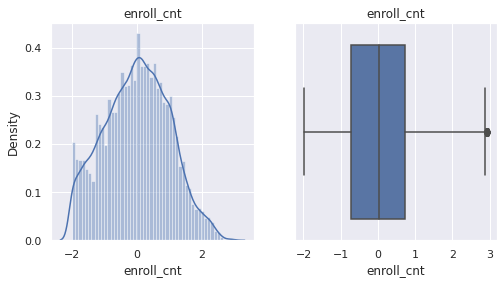

In [68]:
distbox(1,data_prep)

This feature is Gaussian and on the same scale as our target; we expect it to be predictive.
### grad_cnt

Skewness: 0.005268
Kurtosis: -0.317403
count    3.967400e+04
mean     1.077317e-15
std      1.000013e+00
min     -3.079111e+00
25%     -7.166318e-01
50%      1.667774e-02
75%      7.103035e-01
max      3.186279e+00
Name: grad_cnt, dtype: float64
Nullcount: 0.000000


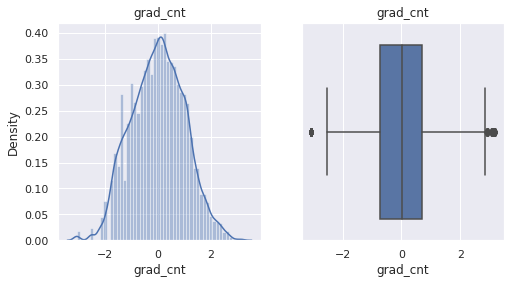

In [69]:
distbox(2,data_prep)

Normalizing and standardizing this feature has improved the skew and shape dramatically. 
### grd_pct

Skewness: -0.491204
Kurtosis: -0.685276
count    3.967400e+04
mean     2.115216e-15
std      1.000013e+00
min     -2.266169e+00
25%     -6.995823e-01
50%      1.505791e-01
75%      7.985921e-01
max      1.428338e+00
Name: grad_pct, dtype: float64
Nullcount: 0.000000


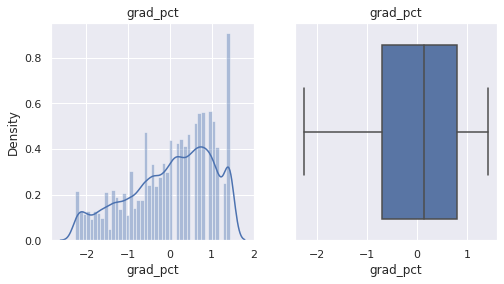

In [70]:
distbox(3,data_prep)

Our transformation has improved the skew and shape of grad_pct.
### local_cnt

Skewness: 0.053227
Kurtosis: -0.618121
count    3.967400e+04
mean    -2.723436e-15
std      1.000013e+00
min     -1.596883e+00
25%     -7.930121e-01
50%      9.570248e-02
75%      7.277351e-01
max      2.645622e+00
Name: local_cnt, dtype: float64
Nullcount: 0.000000


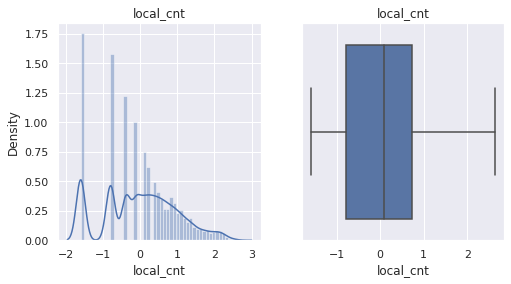

In [71]:
distbox(4,data_prep)

Our transformation has improved the skew and shape of grad_pct.
### local_pct

Skewness: -0.014733
Kurtosis: -0.505537
count    3.967400e+04
mean     1.200526e-16
std      1.000013e+00
min     -1.609430e+00
25%     -6.503470e-01
50%      1.472552e-01
75%      6.826212e-01
max      3.031881e+00
Name: local_pct, dtype: float64
Nullcount: 0.000000


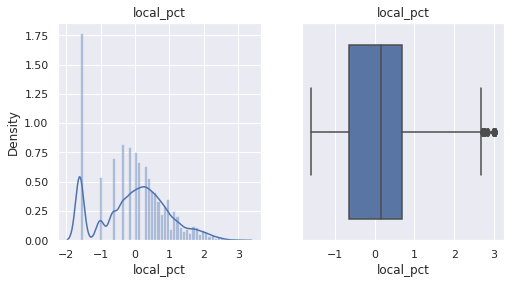

In [72]:
distbox(5,data_prep)

Our transformation has improved the skew and shape of local_pct.
### reg_adv_cnt

Skewness: -0.005711
Kurtosis: -0.734341
count    3.967400e+04
mean    -1.901936e-15
std      1.000013e+00
min     -1.670955e+00
25%     -7.523044e-01
50%      2.509421e-02
75%      7.352389e-01
max      2.918505e+00
Name: reg_adv_cnt, dtype: float64
Nullcount: 0.000000


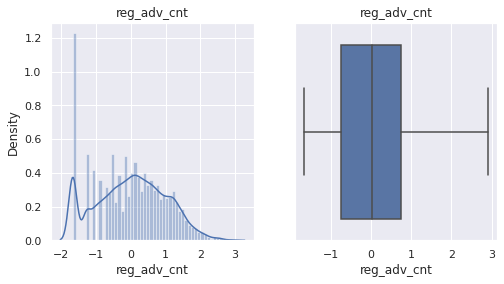

In [73]:
distbox(6,data_prep)

Our transformation has improved the skew and shape of reg_adv_cnt.
### reg_adv_pct

Skewness: -0.306184
Kurtosis: -0.803661
count    3.967400e+04
mean     3.208402e-15
std      1.000013e+00
min     -1.773224e+00
25%     -6.606075e-01
50%      1.144225e-01
75%      7.582462e-01
max      2.179549e+00
Name: reg_adv_pct, dtype: float64
Nullcount: 0.000000


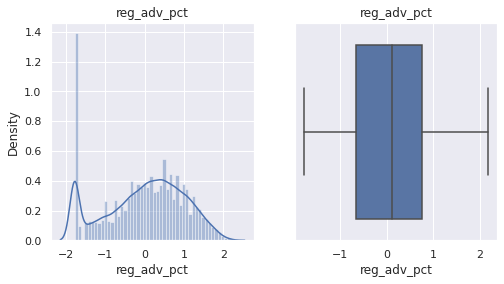

In [74]:
distbox(7,data_prep)

Our transformation hasn't improved the skew and shape of reg_adv_pct much, but it has changed the scale to be in line with other features.
### non_diploma_credential_cnt

Skewness: 0.430680
Kurtosis: -1.463213
count    3.967400e+04
mean     2.421897e-15
std      1.000013e+00
min     -8.869371e-01
25%     -8.869371e-01
50%     -8.869371e-01
75%      1.030762e+00
max      2.002962e+00
Name: non_diploma_credential_cnt, dtype: float64
Nullcount: 0.000000


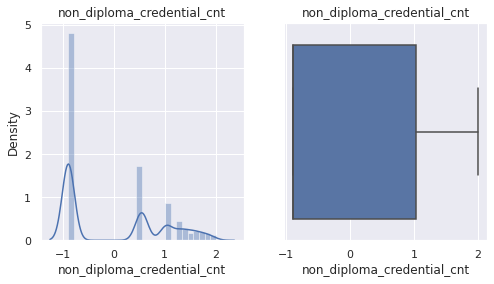

In [75]:
distbox(8,data_prep)

Our transformation reduced the distance between the outliers dramatically, and fixed the skew problem.

### non_diploma_credential_pct

Skewness: 0.550715
Kurtosis: -1.462178
count    3.967400e+04
mean    -2.294405e-14
std      1.000013e+00
min     -8.118377e-01
25%     -8.118377e-01
50%     -8.118377e-01
75%      1.105788e+00
max      1.857452e+00
Name: non_diploma_credential_pct, dtype: float64
Nullcount: 0.000000


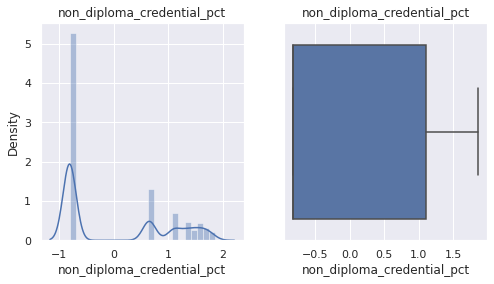

In [76]:
distbox(9,data_prep)

Our transformation reduced the distance between the outliers dramatically, and fixed the skew problem.

### still_enr_cnt

Skewness: 0.216159
Kurtosis: -1.107285
count    3.967400e+04
mean    -1.422336e-14
std      1.000013e+00
min     -1.205229e+00
25%     -1.205229e+00
50%      1.361756e-01
75%      7.113122e-01
max      2.223487e+00
Name: still_enr_cnt, dtype: float64
Nullcount: 0.000000


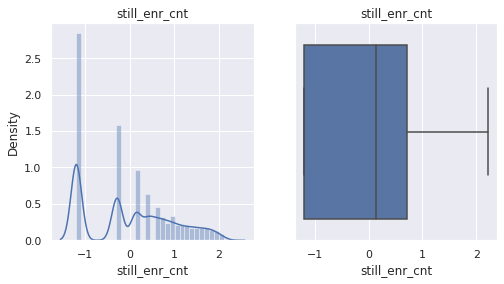

In [77]:
distbox(10,data_prep)

Our transformation reduced the distance between the outliers dramatically, and fixed the skew problem.

### still_enr_pct

Skewness: 0.099895
Kurtosis: -1.270407
count    3.967400e+04
mean     1.805226e-14
std      1.000013e+00
min     -1.206531e+00
25%     -1.206531e+00
50%      1.394214e-02
75%      7.692194e-01
max      2.392295e+00
Name: still_enr_pct, dtype: float64
Nullcount: 0.000000


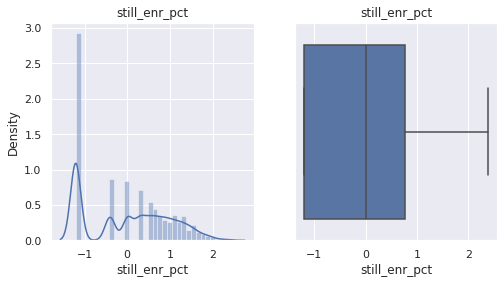

In [78]:
distbox(11,data_prep)

Our transformation reduced the distance between the outliers dramatically, and fixed the skew problem.

### ged_cnt

Skewness: 1.139871
Kurtosis: -0.636969
count    3.967400e+04
mean    -1.004848e-14
std      1.000013e+00
min     -5.886440e-01
25%     -5.886440e-01
50%     -5.886440e-01
75%      1.388370e+00
max      1.940388e+00
Name: ged_cnt, dtype: float64
Nullcount: 0.000000


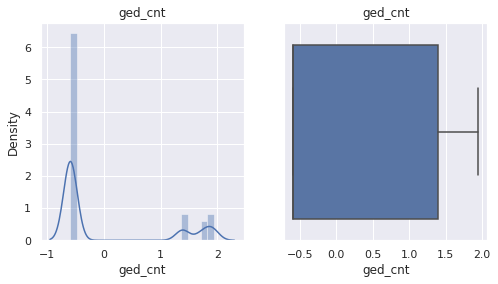

In [79]:
distbox(12,data_prep)

Our transformation reduced the distance between the outliers dramatically, and fixed the skew problem.

### ged_pct

Skewness: 1.324905
Kurtosis: -0.231488
count    3.967400e+04
mean    -3.860407e-14
std      1.000013e+00
min     -5.383187e-01
25%     -5.383187e-01
50%     -5.383187e-01
75%     -5.383187e-01
max      1.976141e+00
Name: ged_pct, dtype: float64
Nullcount: 0.000000


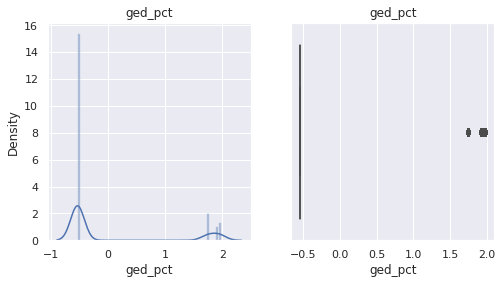

In [80]:
distbox(13,data_prep)

Our transformation reduced skew and kurtosis dramatically, though the distribution still doesn't look great, though it does look less bad. Outliers seem to have had a very large effect on this feature, 

### dropout_cnt

Skewness: 0.107941
Kurtosis: -0.795314
count    3.967400e+04
mean    -7.379577e-15
std      1.000013e+00
min     -1.473244e+00
25%     -6.526027e-01
50%      1.647211e-02
75%      7.151763e-01
max      2.404201e+00
Name: dropout_cnt, dtype: float64
Nullcount: 0.000000


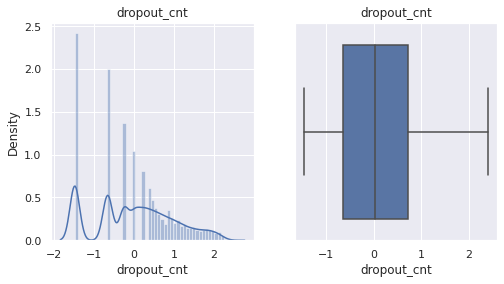

In [81]:
distbox(14,data_prep)

Our transformation reduced the distance between the outliers dramatically, and fixed the skew problem.

### dropout_pct

Skewness: -0.023028
Kurtosis: -0.891358
count    3.967400e+04
mean    -3.285876e-15
std      1.000013e+00
min     -1.468148e+00
25%     -8.896040e-01
50%      8.551653e-02
75%      7.395783e-01
max      2.955428e+00
Name: dropout_pct, dtype: float64
Nullcount: 0.000000


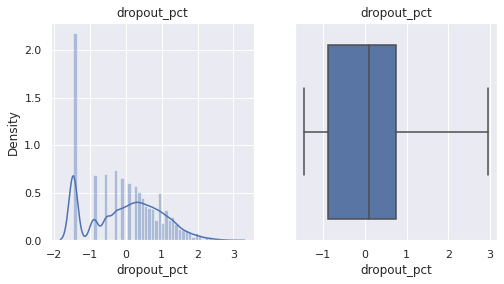

In [82]:
distbox(15,data_prep)

Our transformation reduced the distance between the outliers dramatically, and fixed the skew problem.
### reg_pct_level (TARGET)

medium    32258
low        3915
high       3501
Name: reg_pct_level, dtype: int64
Nullcount: 0.000000


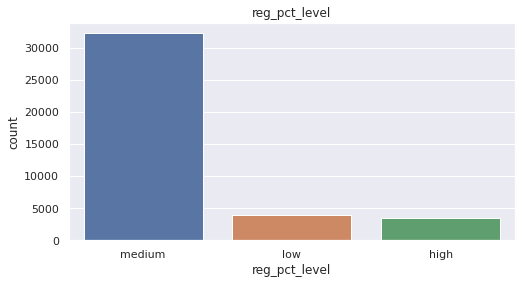

In [83]:
distbox(16,data_prep, 'categorical', normalize=False)

The vast majority of our target features fall into the 'medium' class. The distribution was normal before our transformation, so this falls in line with our expectations.

## Correlation Analysis

Analyses of non-categorical co-linearity

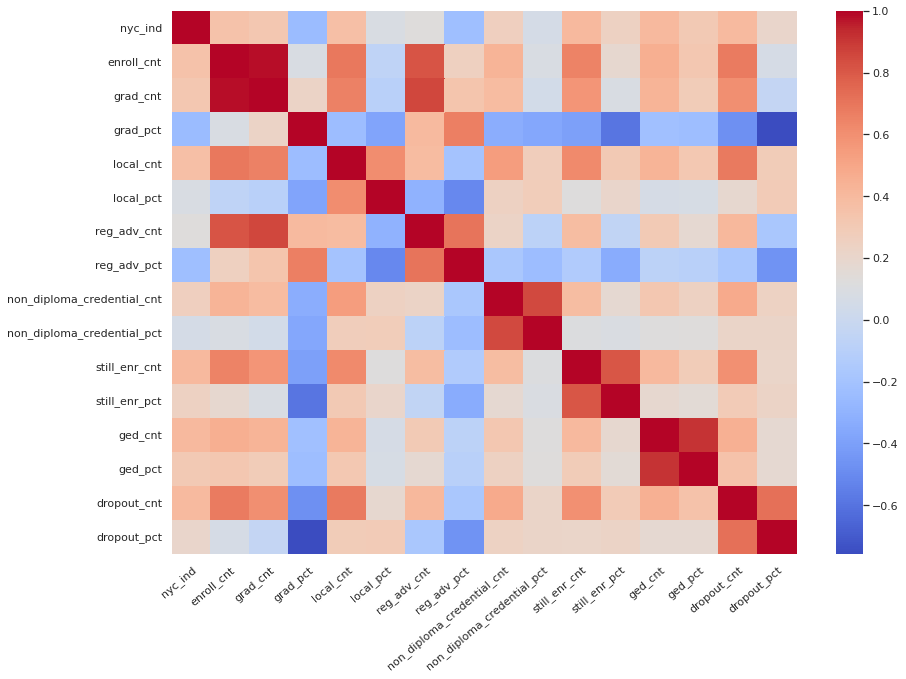

In [84]:
plt.figure(figsize=(14,10))
sns.heatmap(data_prep.iloc[:,:17].corr(),cmap='coolwarm',annot=False);
plt.xticks(rotation=40 , rotation_mode='anchor',ha="right");

We see many correlated features here. Some are cnt/pct pairs, which haven't changed from the original dataset. Others are much more predictive after standardization and normalization. This is useful, as it will allow our decision tree model to ignore the correlated features. In other models, we would eliminate some of these manually.

# Decision Tree & Random Forest Modeling 

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
# https://github.com/parrt/random-forest-importances
import rfpimp 

## Feature Set 1

### Test Train Split

In [86]:
# Separate features and response variables. 
# sparse_columns = ['loyalty']

X = data_prep.drop(['reg_pct_level'], axis = 1)# assign the explanatory variables to a Python object
y = data_prep.reg_pct_level.values# assign the response variable to a Python object

# split the data into training + testing subsets. code removed when implementing a test/train/validate split
#X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify = y1 #stratifying to account for sparse classes)

#split training, testing, validating subsets based on code found here: https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn
# Defines ratios, w.r.t. whole dataset.
ratio_train = 0.8
ratio_val = 0.1
ratio_test = 0.1

# Produces test split.
X_remaining, X_test, y_remaining, y_test = train_test_split(
    X, y, 
    test_size=ratio_test, 
    random_state=42,
    stratify = y #stratifying to account for sparse classes
    )

# Adjusts val ratio, w.r.t. remaining dataset.
ratio_remaining = 1 - ratio_test
ratio_val_adjusted = ratio_val / ratio_remaining

# Produces train and val splits.
X_train, X_val, y_train, y_val = train_test_split(
    X_remaining, y_remaining, 
    test_size=ratio_val_adjusted,
    random_state=42,
    stratify = y_remaining
    )

### Decision Tree

In [87]:
#Importing the Decision tree classifier from the sklearn library.
clf = DecisionTreeClassifier(criterion = 'entropy')#we will use entropy in all models for consistency. Entropy tends to be slower than the gini criterion, but slightly more accurate.
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

#### Metrics

In [88]:
y_pred = clf.predict(X_test)
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.9881552419354839


In [89]:
clf = DecisionTreeClassifier(criterion='entropy', 
                             max_leaf_nodes=40, 
                             splitter='best')

clf.fit(X_train, y_train)
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))

Accuracy Score on train data:  0.9395677106307896


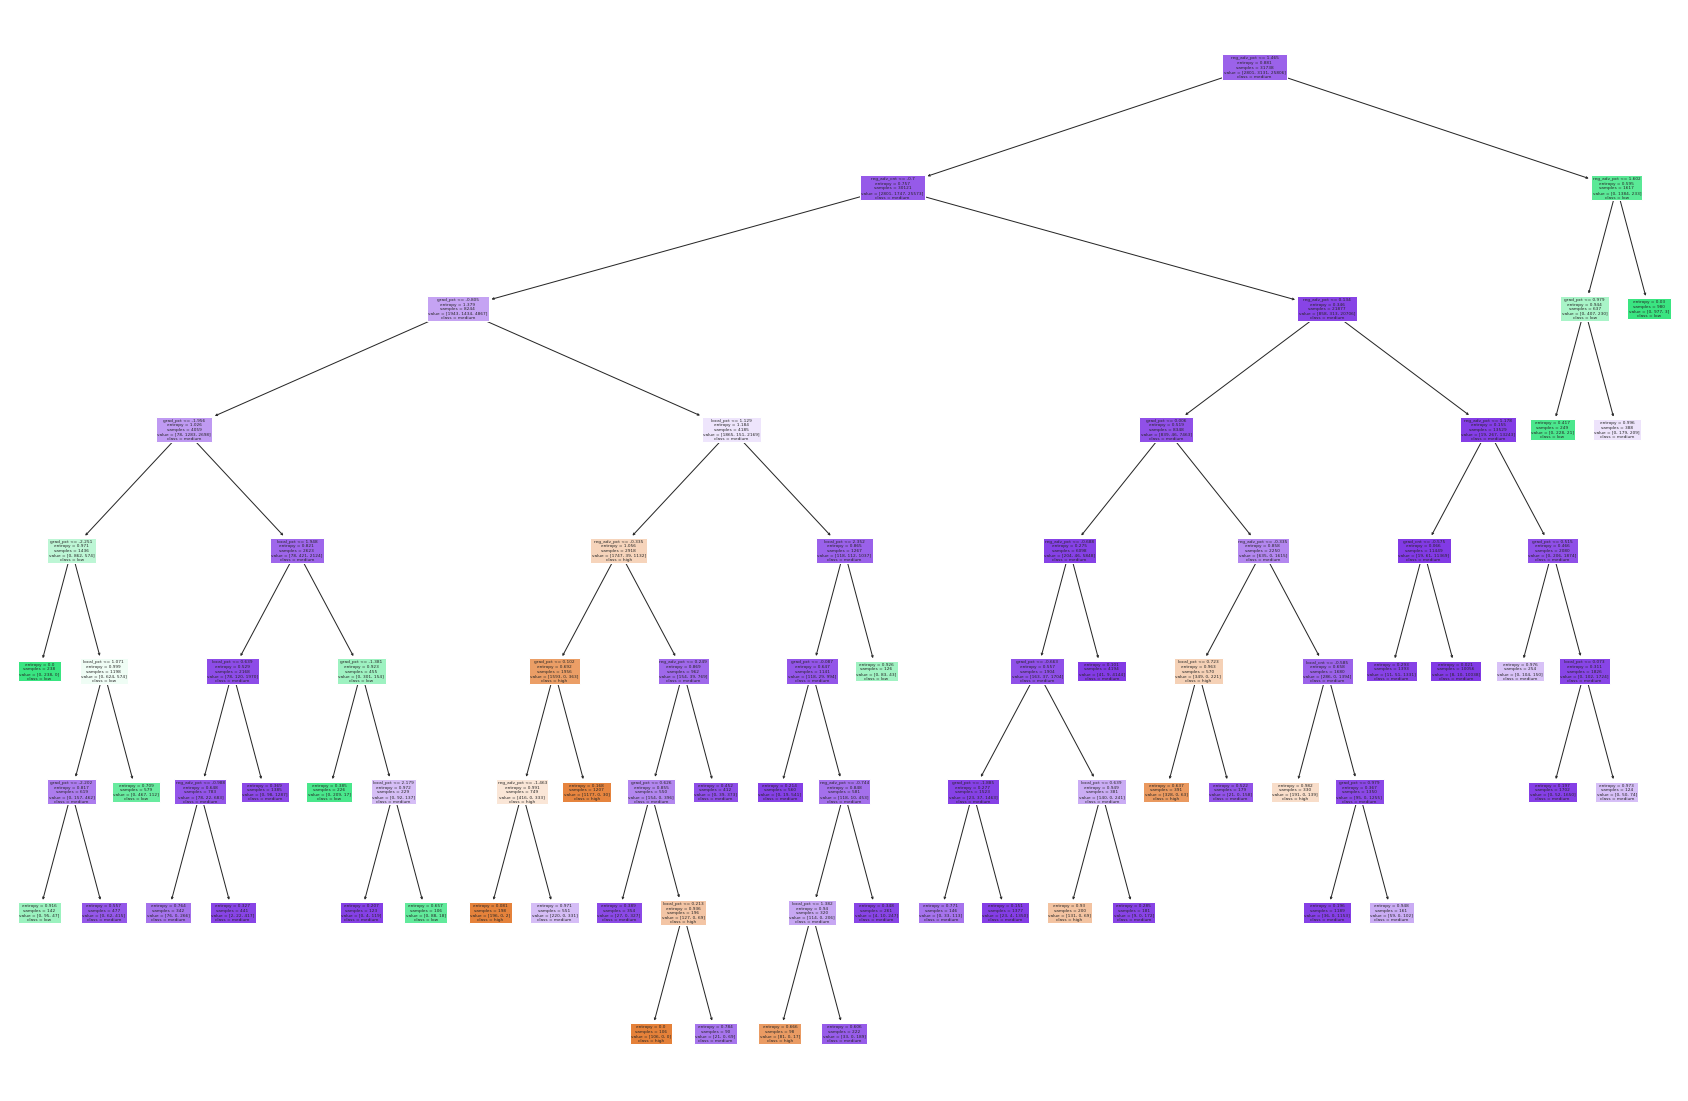

In [90]:
from sklearn import tree
plt.figure(figsize=(30,20))
tree.plot_tree(clf, feature_names=X_train.columns,
                   class_names=clf.classes_,#add class names to tree diagram
                   filled=True,);

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


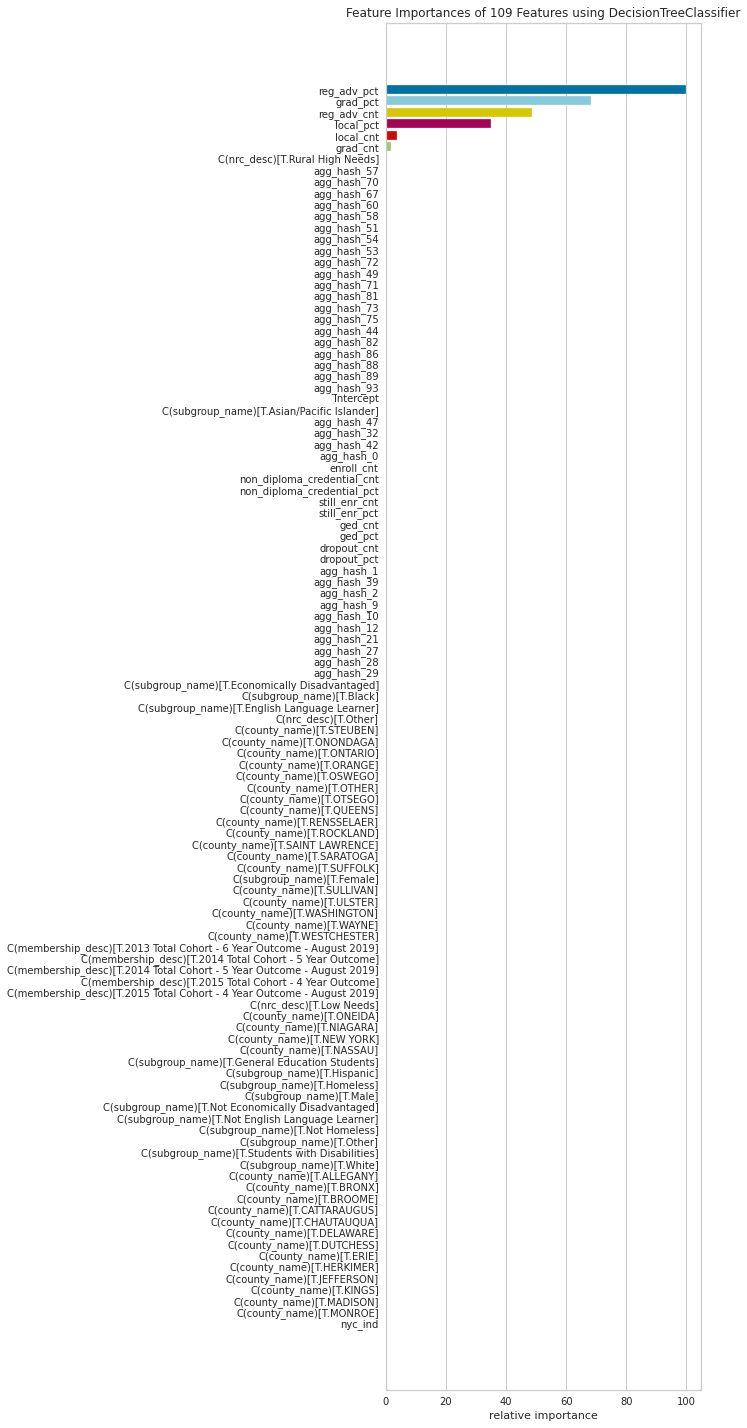

In [91]:
from yellowbrick.model_selection import FeatureImportances
fig, ax = plt.subplots(figsize=(10,20));
viz = FeatureImportances(clf);
viz.fit(X_train, y_train);
viz.show();

In [92]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        high       0.97      0.97      0.97       350
         low       0.95      0.97      0.96       392
      medium       0.99      0.99      0.99      3226

    accuracy                           0.99      3968
   macro avg       0.97      0.98      0.98      3968
weighted avg       0.99      0.99      0.99      3968



### Random Forest

In [93]:
# substantiating classifier 
rf = RandomForestClassifier(
                            n_jobs=-1,
                            n_estimators=1000,
                            )

# training model 
rf.fit(X_train, y_train)

# using rfpimp to find feature importanaces
imp = rfpimp.importances(rf,X_test,y_test) # use of test data in this context recomened in function documentation
imp.Importance

#### Metrics

In [94]:
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=rf.predict(X_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=rf.predict(X_test)))

Accuracy Score on train data:  1.0
Accuracy Score on the test data:  0.985383064516129


In [95]:
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

        high       0.99      0.92      0.95       350
         low       0.98      0.96      0.97       392
      medium       0.99      1.00      0.99      3226

    accuracy                           0.99      3968
   macro avg       0.98      0.96      0.97      3968
weighted avg       0.99      0.99      0.99      3968



## Feature Set 2

For our second two models, we will start by reducing the dimensionality of our input data through the use of PCA(principal component analysis). 

We will then utilize cost complexity analysis to perform hyper-parameter tuning on our decision tree model and set hyper-parameters based on this analysis. (procedure identified from Sklearn documentation https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html)

### PCA Feature Selection

In [96]:
pca_columns = pct_columns+cnt_columns
X_pca = X_train[pca_columns]
X_train2 = X_train.drop(pca_columns,axis=1)

In [97]:
X_train2

,nyc_ind,agg_hash_0,agg_hash_1,agg_hash_2,agg_hash_9,agg_hash_10,agg_hash_12,agg_hash_21,agg_hash_27,agg_hash_28,agg_hash_29,agg_hash_32,agg_hash_39,agg_hash_42,agg_hash_44,agg_hash_47,agg_hash_49,agg_hash_51,agg_hash_53,agg_hash_54,agg_hash_57,agg_hash_58,agg_hash_60,agg_hash_67,agg_hash_70,agg_hash_71,agg_hash_72,agg_hash_73,agg_hash_75,agg_hash_81,agg_hash_82,agg_hash_86,agg_hash_88,agg_hash_89,agg_hash_93,Intercept,C(subgroup_name)[T.Asian/Pacific Islander],C(subgroup_name)[T.Black],C(subgroup_name)[T.Economically Disadvantaged],C(subgroup_name)[T.English Language Learner],C(subgroup_name)[T.Female],C(subgroup_name)[T.General Education Students],C(subgroup_name)[T.Hispanic],C(subgroup_name)[T.Homeless],C(subgroup_name)[T.Male],C(subgroup_name)[T.Not Economically Disadvantaged],C(subgroup_name)[T.Not English Language Learner],C(subgroup_name)[T.Not Homeless],C(subgroup_name)[T.Other],C(subgroup_name)[T.Students with Disabilities],C(subgroup_name)[T.White],C(county_name)[T.ALLEGANY],C(county_name)[T.BRONX],C(county_name)[T.BROOME],C(county_name)[T.CATTARAUGUS],C(county_name)[T.CHAUTAUQUA],C(county_name)[T.DELAWARE],C(county_name)[T.DUTCHESS],C(county_name)[T.ERIE],C(county_name)[T.HERKIMER],C(county_name)[T.JEFFERSON],C(county_name)[T.KINGS],C(county_name)[T.MADISON],C(county_name)[T.MONROE],C(county_name)[T.NASSAU],C(county_name)[T.NEW YORK],C(county_name)[T.NIAGARA],C(county_name)[T.ONEIDA],C(county_name)[T.ONONDAGA],C(county_name)[T.ONTARIO],C(county_name)[T.ORANGE],C(county_name)[T.OSWEGO],C(county_name)[T.OTHER],C(county_name)[T.OTSEGO],C(county_name)[T.QUEENS],C(county_name)[T.RENSSELAER],C(county_name)[T.ROCKLAND],C(county_name)[T.SAINT LAWRENCE],C(county_name)[T.SARATOGA],C(county_name)[T.STEUBEN],C(county_name)[T.SUFFOLK],C(county_name)[T.SULLIVAN],C(county_name)[T.ULSTER],C(county_name)[T.WASHINGTON],C(county_name)[T.WAYNE],C(county_name)[T.WESTCHESTER],C(membership_desc)[T.2013 Total Cohort - 6 Year Outcome - August 2019],C(membership_desc)[T.2014 Total Cohort - 5 Year Outcome],C(membership_desc)[T.2014 Total Cohort - 5 Year Outcome - August 2019],C(membership_desc)[T.2015 Total Cohort - 4 Year Outcome],C(membership_desc)[T.2015 Total Cohort - 4 Year Outcome - August 2019],C(nrc_desc)[T.Low Needs],C(nrc_desc)[T.Other],C(nrc_desc)[T.Rural High Needs]
58724,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,5.0,5.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,-1.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,-5.0,-1.0,1.0,-3.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
39706,0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,-1.0,0.0,3.0,3.0,0.0,3.0,0.0,0.0,-1.0,0.0,0.0,3.0,0.0,-1.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,-10.0,-1.0,1.0,-3.0,0.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
68208,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,-1.0,0.0,3.0,-1.0,0.0,0.0,0.0,0.0,-8.0,0.0,1.0,-4.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
69744,0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,-1.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,-6.0,0.0,1.0,-2.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
24875,0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,1.0,0.0,-10.0,0.0,2.0,-3.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [98]:
from sklearn.decomposition import PCA

# 3. create an instance of a PCA model +
# set the number of components was set initially to 44 number of variables to support visualizations
pca = PCA()

# 4. apply the PCA function to the training data
pca_data =  pca.fit_transform(X_pca)

# display the explained variance ratio for the principal components we've derived from the data
print(pca.explained_variance_ratio_*100)

[36.75074067 24.36022239 10.14383373  9.28779839  7.14631206  6.89043886
  2.71043651  0.68298072  0.55611915  0.42417577  0.30656704  0.26635321
  0.23525393  0.19200203  0.04676554]


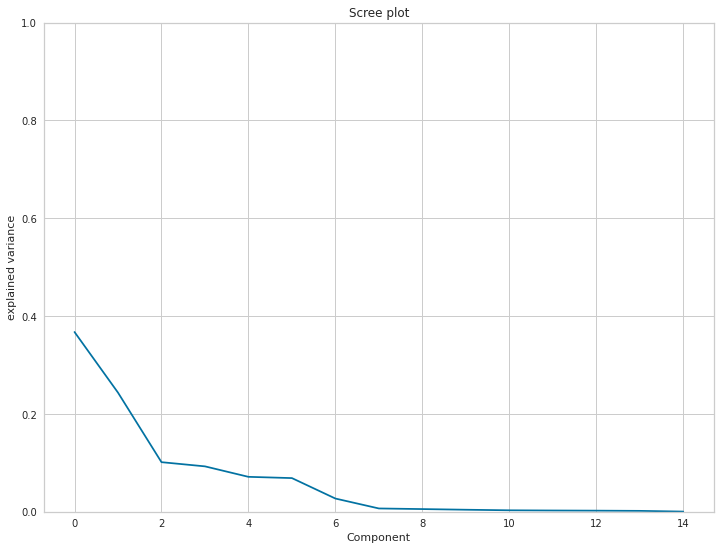

In [99]:
f, ax = plt.subplots(figsize=(12,9));
ax.plot(pca.explained_variance_ratio_)
ax.set(
    xlabel = "Component",
    ylabel = "explained variance",
    title = "Scree plot",
    ylim = (0,1)
);

In [100]:
sum(pca.explained_variance_ratio_[:5])

0.8768890724099351

From the chart above, we select 5 pca's which explains .87 percent of variance

In [101]:
df_pca = pd.DataFrame(pca_data[:,:5],columns=[f'pca_{x+1}'for x in range(5)])

X_train2 = X_train2.reset_index(drop=True).join(df_pca)

In [102]:
# updating testing data 
test_pca = pd.DataFrame(
                        data =pca.transform(X_test[pca_columns])[:,:5],
                        columns=[f'pca_{x+1}'for x in range(5)]
                        )

X_test2  = X_test.drop(pca_columns,
                        axis =1
                        ).reset_index(drop=True).join(test_pca)

# updating validation data 
validation_pca = pd.DataFrame(
                                data =pca.transform(X_val[pca_columns])[:,:5],
                                columns=[f'pca_{x+1}'for x in range(5)]
                                )


X_val2 = X_val.drop(pca_columns,
                        axis =1
                        ).reset_index(drop=True).join(test_pca)

In [103]:
# sanity checking procedure above
len(X_val)==len(X_val2)

True

### Decision Tree

we will first perform a cost complexity analysis to determin optimum hyperparameters and then train the model based on this analysis.

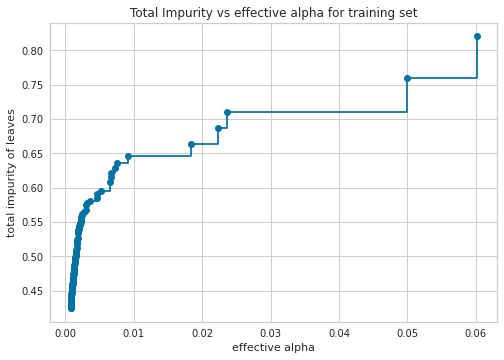

In [104]:
#Importing the Decision tree classifier from the sklearn library.
clf2 = DecisionTreeClassifier(criterion = 'entropy')

path = clf2.cost_complexity_pruning_path(X_train2, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


fig, ax = plt.subplots()

ax.plot(ccp_alphas[-100:-1], impurities[-100:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [105]:
ccp_alphas.shape

(1205,)

In [106]:
clfs = []
for ccp_alpha in ccp_alphas[-100:-1]:
    clf_alpha = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, criterion = 'entropy')
    clf_alpha.fit(X_train2, y_train)
    clfs.append(clf_alpha)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 3 with ccp_alpha: 0.0609973800027368


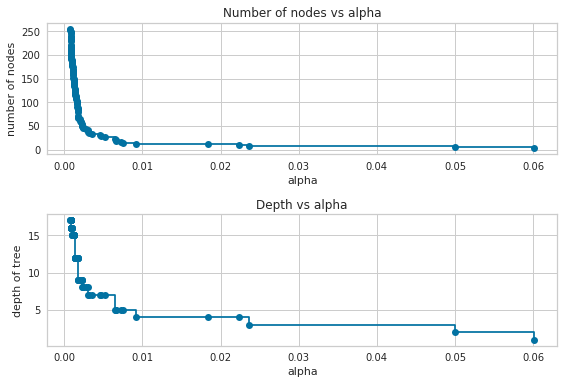

In [107]:
#clfs = clfs[:-1]
ccp_alphas = ccp_alphas[-100:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Conclusion:** based on the analysis above, we will set a Max depth of 6. 

In [108]:
del clfs

In [109]:
clf2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=6)
clf2.fit(X_train2,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

#### Metrics

In [110]:
y_pred2 = clf2.predict(X_test2)
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf2.predict(X_train2)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred2))

Accuracy Score on train data:  0.8609553216963892
Accuracy Score on test data:  0.8596270161290323


In [111]:
print(classification_report(y_test,clf2.predict(X_test2)))

              precision    recall  f1-score   support

        high       0.70      0.32      0.44       350
         low       0.77      0.41      0.53       392
      medium       0.87      0.97      0.92      3226

    accuracy                           0.86      3968
   macro avg       0.78      0.57      0.63      3968
weighted avg       0.85      0.86      0.84      3968



findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


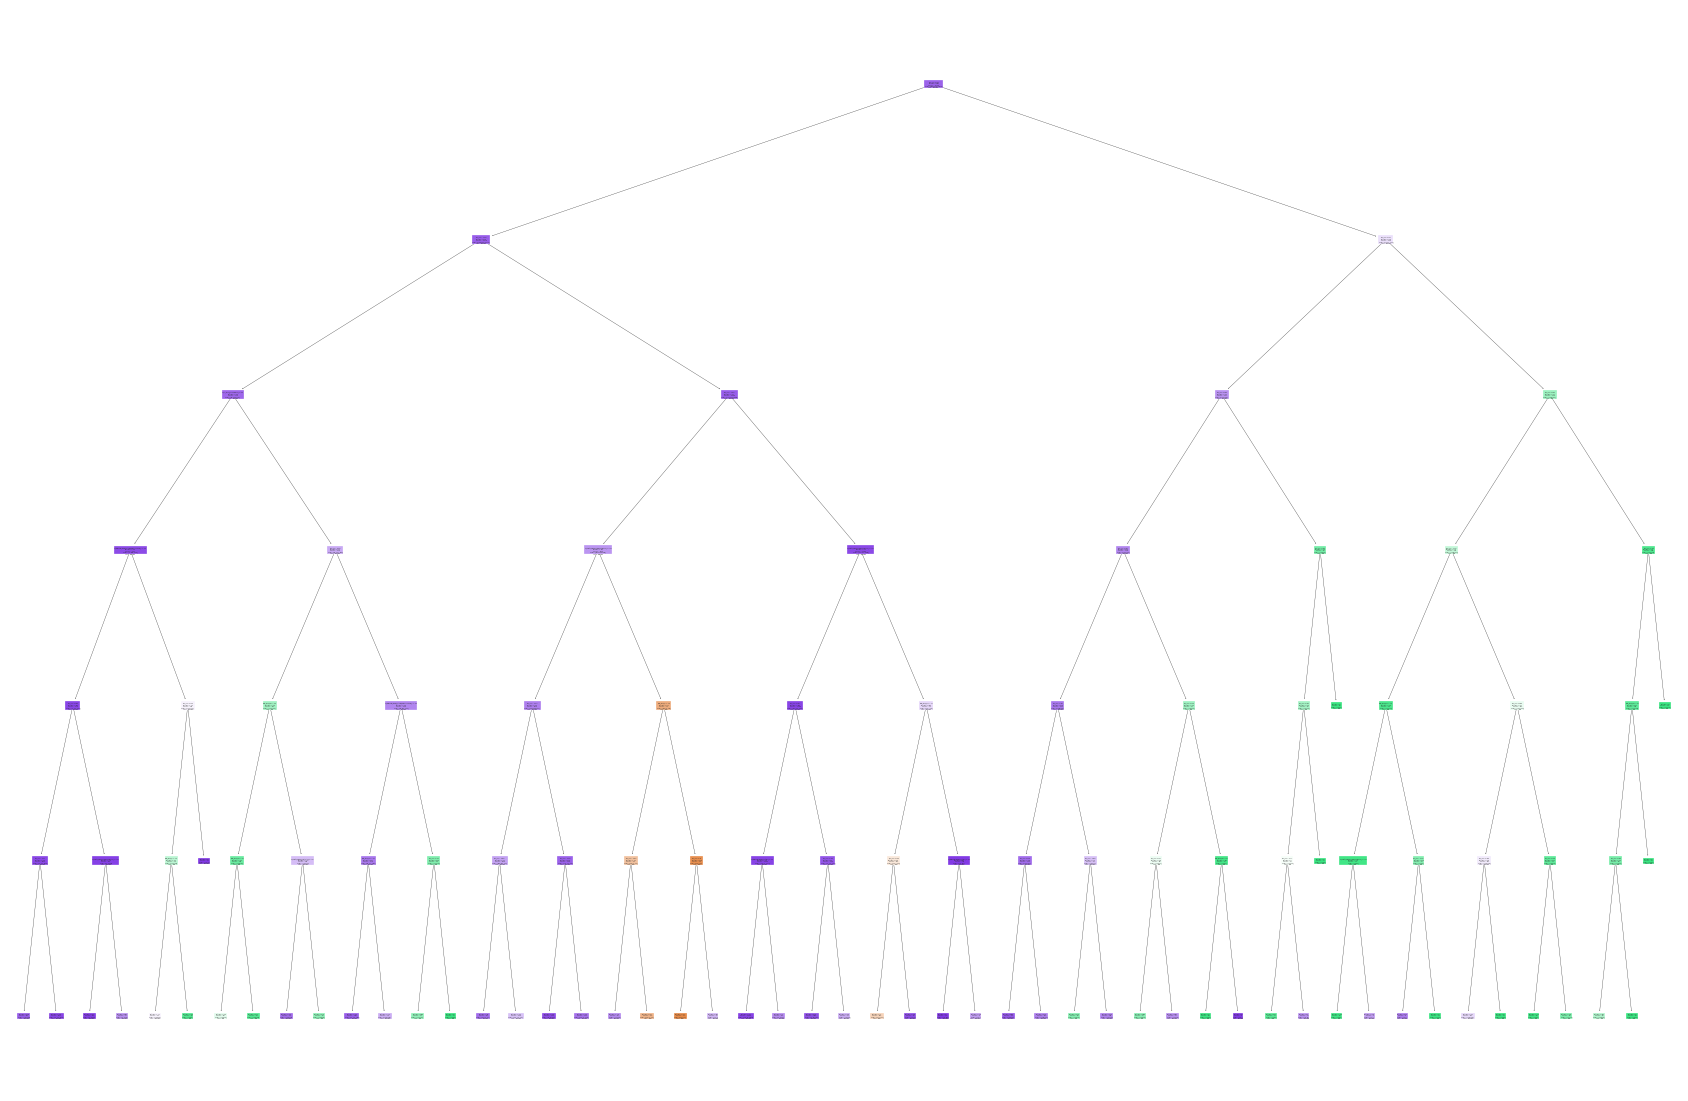

In [112]:
from sklearn import tree
plt.figure(figsize=(30,20))
tree.plot_tree(clf2, feature_names=X_train2.columns,
                   class_names=clf2.classes_,#add class names to tree diagram
                   filled=True,);

### Random Forest 

In [113]:
# substantiating classifier 
rf2 = RandomForestClassifier(
                            n_jobs=-1,
                            n_estimators=1000,
                            )

# training model 
rf2.fit(X_train2, y_train)

# using rfpimp to find feature importanaces
imp = rfpimp.importances(rf2,X_test2,y_test) # use of test data in this context recomended in function documentation
imp.Importance

#### Metrics

In [114]:
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=rf2.predict(X_train2)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=rf2.predict(X_test2)))

Accuracy Score on train data:  1.0
Accuracy Score on the test data:  0.9657258064516129


In [115]:
print(classification_report(y_test,rf2.predict(X_test2)))

              precision    recall  f1-score   support

        high       0.98      0.81      0.89       350
         low       0.97      0.86      0.91       392
      medium       0.96      1.00      0.98      3226

    accuracy                           0.97      3968
   macro avg       0.97      0.89      0.93      3968
weighted avg       0.97      0.97      0.96      3968



# Model Selection

## Model Summary

| Model             | Precision | Recall | F1  | Accuracy |
|     :-:                |   :-: |  :-:  |  :-:  | :--:|
| Decision Tree 1: high   | .97  | .98    | .98  | --- |
| Random Forest 1: high   | .99  | .91    | .95  | --- |
| Decision Tree 2: high   | .70  | .32    | .44  | --- |
| Random Forest 2: high   | .98  | .81    | .89  | --- |   
| Decision Tree 1: low    | .95  | .97    | .96  | --- |
| Random Forest 1: low    | .98  | .96    | .97  | --- |
| Decision Tree 2: low    | .77  | .41    | .53  | --- |
| Random Forest 2: low    | .97  | .87    | .92  | --- |    
| Decision Tree 1: medium | .99  | .99    | .99  | --- |
| Random Forest 1: medium | .99  |  1     | .99  | --- |
| Decision Tree 2: medium | .87  | .97    | .92  | --- |
| Random Forest 2: medium | .97  |  1     | .98  | --- |    
| Decision Tree 1: avg    | .97  | .98    | .976 | .99 |
| Random Forest 1: avg    | .986 | .956   | .97  | .98 |  
| Decision Tree 2: avg    | .78  | .563   | .63  | .86 |
| Random Forest 2: avg    | .973 | .897   | .93  | .97 |   

## Cross Validation

In [128]:
from sklearn.model_selection import cross_val_score
model1 = [clf,rf]

for model in model1:
    vals = cross_val_score(model,X_train,y_train,cv=5 )
    print(f'{model} crossval scores: \n mean:{vals.mean()}\n std:{vals.std()}')

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=40) crossval scores: 
 mean:0.9388431281855322
 std:0.0026269120554479825
RandomForestClassifier(n_estimators=1000, n_jobs=-1) crossval scores: 
 mean:0.9773773021285578
 std:0.0014894195514349976


In [129]:
model2 = [clf2,rf2]

for model in model2:
    vals = cross_val_score(model,X_train2,y_train,cv=5)
    print(f'{model} crossval scores: \n mean:{vals.mean()}\n std:{vals.std()}')

DecisionTreeClassifier(criterion='entropy', max_depth=6) crossval scores: 
 mean:0.8584975471793083
 std:0.00427269198895747
RandomForestClassifier(n_estimators=1000, n_jobs=-1) crossval scores: 
 mean:0.9507214607737815
 std:0.0023134508915332


## Preferred Model

Based on the testing scores above, the "best" model is our original Decision Tree. However, we will select our second-best performing, the **Random Forest model** trained on our initial feature set as our final model. The cross validation on the training dataset proves this line of thinking, with an average 4 percent increase.

The second feature set seems to have performed significantly worse, likely due to data loss in the PCA.

In general, we expect the random forest model to generalize better and thus will prefer it given the similarity in metric scores. We expect it to fix any overfitting problems.

Our second decision tree model faired the worst despite significant work in trying to ensure a good balance between over-fitting and initial accuracy. 

In [130]:
print(classification_report(y_val,rf.predict(X_val)))

              precision    recall  f1-score   support

        high       1.00      0.95      0.97       350
         low       0.99      0.97      0.98       392
      medium       0.99      1.00      0.99      3226

    accuracy                           0.99      3968
   macro avg       0.99      0.97      0.98      3968
weighted avg       0.99      0.99      0.99      3968



The validation scores of the Random Forest model all improve upon the testing scores. It is also now competitive with the first decision tree model. This validates our model and our selection process.

# Conclusion

Our modeling shows that decision trees tend to perform worse than random forest models. We were surprised to see that applying PCA on our dataset would make our model perform worse. 

Potential next steps include;
- Finding ways to make the models less memory intensive
- Performing other feature selections to see if model performance can be improved
- Attempting to train a different model to find natural groupings, instead of our artificial low, medium, high